In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


<h1 align='center'> Airbnb Data Analysis </h1>

<div align="center">
    <img src="https://mediaindia.eu/wp-content/uploads/2017/06/airbnb.jpg">
</div>

# About Dataset: 
Airbnb, Inc is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City

# Data Dictionary
Data dictionaries are used to provide detailed information about the contents of a dataset or database, such as the names of measured variables, their data types or formats, and text descriptions. A data dictionary provides a concise guide to understanding and using the data.

**id:** Airbnb's unique identifier for the listing.

**NAME:** The name or title of the listing.

**host id:** Airbnb's unique identifier for the host/user of the listing.

**host name:** The name of the host, usually just the first name(s).

**neighbourhood group:** The geocoded neighborhood group based on latitude and longitude, using open or public digital shapefiles.

**neighbourhood:** The neighborhood where the listing is located.

**latitude:** The latitude coordinate of the listing's location using the WGS84 projection.

**longitude:** The longitude coordinate of the listing's location using the WGS84 projection.

**country:** The country where the listing is located.

**country code:** The country code of the listing's location.

**instant_bookable:** Indicates whether the guest can automatically book the listing without the host requiring to accept their booking request (true/false).

**cancellation_policy:** The policy set by the host for cancellations.

**room_type:** The type of room or accommodation available (e.g., Entire home/apt, Private room, Shared room, Hotel).

**Construction year:** The year when the property was constructed.

**price:** The daily price of the listing in the local currency.

**service fee:** The additional fee charged for the service.

**minimum_nights:** The minimum number of nights required for booking the listing.

**number_of_reviews:** The total number of reviews the listing has received.

**last_review:** The date of the last/newest review.

**reviews_per_month:** The average number of reviews per month for the listing.

**availability_365:** The number of days the listing is available for booking within the next 365 days.

**house_rules:** The rules set by the host for guests staying at the listing.

**license:** The license/permit/registration number associated with the listing.


# Data Exploration

In [3]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

In [5]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [6]:
df.shape

(102599, 26)

In [7]:
df['id'].nunique()

102058

In [8]:
has_duplicates = df.duplicated('id').any()
has_duplicates

True

In [9]:
df.duplicated('id').sum()

541

In [10]:
df.drop_duplicates(subset='id', inplace=True)

In [11]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_pol

In [14]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


### Data Understanding
- Here we have a DataFrame with 102,599 rows and 26 columns.

- We have identified the presence of null values in various columns of the DataFrame.

- In the 'minimum nights' column, there are outliers such as a minimum value of -1223 and a maximum value of 5645. These extreme values could be potential errors or data entry issues that need to be investigated further.

- Similarly, in the 'availability 365' column, there is a negative value of -10, which seems incorrect since availability should typically be a positive value representing the number of days an accommodation is available. It would be necessary to examine and address this issue to ensure data integrity.

- To handle null values in different columns, we will apply appropriate methods such as dropping rows/columns, imputing missing values, or ignoring irrelevant columns.

- To correct wrong data types in different columns, we will perform data type conversion using pandas functions.

# Data Cleaning

In [15]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [16]:
df.corr()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
id,1.000000,-0.001189,-0.008600,0.042483,0.000994,0.005305,-0.042115,0.038153,0.036569,0.024062,-0.139318
host id,-0.001189,1.000000,0.000389,-0.008805,0.004726,-0.002359,-0.004800,-0.001980,0.003608,0.001733,-0.002164
lat,-0.008600,0.000389,1.000000,0.074427,0.005489,0.014918,-0.025154,-0.019686,-0.003771,0.032314,-0.005054
long,0.042483,-0.008805,0.074427,1.000000,0.001480,-0.039551,0.069202,0.119059,0.015249,-0.104230,0.058216
Construction year,0.000994,0.004726,0.005489,0.001480,1.000000,-0.000480,0.001897,0.004117,0.005031,-0.002627,-0.008096
minimum nights,0.005305,-0.002359,0.014918,-0.039551,-0.000480,1.000000,-0.049945,-0.095744,-0.002244,0.084489,0.063167
number of reviews,-0.042115,-0.004800,-0.025154,0.069202,0.001897,-0.049945,1.000000,0.590978,-0.018279,-0.080799,0.099578
reviews per month,0.038153,-0.001980,-0.019686,0.119059,0.004117,-0.095744,0.590978,1.000000,0.037751,-0.025403,0.078100
review rate number,0.036569,0.003608,-0.003771,0.015249,0.005031,-0.002244,-0.018279,0.037751,1.000000,0.024303,-0.006038
calculated host listings count,0.024062,0.001733,0.032314,-0.104230,-0.002627,0.084489,-0.080799,-0.025403,0.024303,1.000000,0.159005


In [17]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [18]:
df[df["NAME"].isna()]["host id"].value_counts()

85098326012    1
10499370936    1
21210003156    1
21180735693    1
82173770967    1
              ..
4560838702     1
64880772630    1
65348082791    1
10450140830    1
33931743606    1
Name: host id, Length: 250, dtype: int64

In [19]:
df[df["host id"].isin(list(df[df["NAME"].isna()]["host id"].unique()))]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
57,1032817,NaN,18424415847,unconfirmed,Carina,Manhattan,Lower East Side,40.72004,-73.99104,United States,...,$205,5.0,19.0,5/18/2019,0.17,4.0,1.0,NaN,NaN,NaN
58,1033369,NaN,48877238684,NaN,Sophia,Manhattan,Hell's Kitchen,40.75531,-73.99293,United States,...,$132,2.0,289.0,6/9/2019,2.49,3.0,2.0,NaN,NaN,NaN
59,1033922,NaN,71987706184,verified,Rosie,Brooklyn,Greenpoint,40.72401,-73.93788,United States,...,$109,4.0,138.0,6/4/2019,1.19,1.0,3.0,NaN,No smoking.,NaN
60,1034474,NaN,85649449746,verified,Frederick,Manhattan,SoHo,40.72210,-73.99775,United States,...,$51,30.0,21.0,6/29/2019,0.30,5.0,1.0,NaN,Quietly please. I am on the top floor and hav...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100074,56272206,NaN,19395911932,unconfirmed,Alex,Queens,Astoria,40.75989,-73.91343,United States,...,$150,21.0,6.0,1/19/2018,0.19,2.0,1.0,0.0,Please leave the apartment in the same conditi...,NaN
100085,56278282,NaN,24411362869,unconfirmed,Elisia,Manhattan,Harlem,40.80891,-73.94247,United States,...,$145,2.0,113.0,6/23/2019,3.55,2.0,1.0,297.0,- NO SMOKING (You'll have to do that outside i...,NaN
100294,56393712,NaN,87823753249,verified,Irisha,Queens,Fresh Meadows,40.74271,-73.78749,United States,...,$209,1.0,18.0,5/2/2019,0.60,1.0,3.0,173.0,NaN,NaN
100312,56403654,NaN,36683367732,verified,Emmy,Queens,Flushing,40.76153,-73.80304,United States,...,$42,1.0,69.0,2/27/2019,2.19,4.0,4.0,0.0,NaN,NaN


In [20]:
# calculate the % missing values
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.000000
1,NAME,0.244959
2,host id,0.000000
3,host_identity_verified,0.283172
4,host name,0.395853
5,neighbourhood group,0.028415
6,neighbourhood,0.015677
7,lat,0.007839
8,long,0.007839
9,country,0.521272


In [21]:
df["reviews per month"]

0         0.21
1         0.38
2          NaN
3         4.64
4         0.10
          ... 
102053    0.44
102054    0.72
102055    3.12
102056     NaN
102057    0.85
Name: reviews per month, Length: 102058, dtype: float64

In [22]:
working_df = df[['id', 'host id', 'host_identity_verified',
       'neighbourhood group', 'neighbourhood', 'lat', 'long',
        'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month']]

In [23]:
working_df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38
2,1002403,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,77326652202,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,$696,NaN,7.0,12.0,3/27/2019,0.44
102054,57365760,45936254757,verified,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,0.72
102055,57366313,23801060917,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,$387,NaN,2.0,50.0,6/26/2019,3.12
102056,57366865,15593031571,unconfirmed,Manhattan,Harlem,40.81248,-73.94317,True,strict,Private room,NaN,$848,NaN,2.0,0.0,NaN,NaN


In [24]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified      289
neighbourhood group          29
neighbourhood                16
lat                           8
long                          8
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [25]:
working_df["host_identity_verified"].value_counts()

unconfirmed    50944
verified       50825
Name: host_identity_verified, dtype: int64

In [26]:
### Replacing null values in "host_identity_verified" with Unconfirmed assuming the they are the ones who are also not verified users

working_df["host_identity_verified"].fillna("unconfirmed",inplace = True)


In [27]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group          29
neighbourhood                16
lat                           8
long                          8
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [28]:
### checking the unique "neighbourhood" values around the null "neighbourhood group"

working_df[working_df["neighbourhood group"].isna()]["neighbourhood"].unique()

array(['Washington Heights', 'Clinton Hill', 'East Village',
       'Upper East Side', 'Woodside', 'Williamsburg', 'Bushwick',
       'Prospect Heights', 'Chelsea', 'East Harlem', 'Eastchester',
       'Harlem', 'Chinatown', 'Queens Village', 'Bedford-Stuyvesant',
       'Upper West Side'], dtype=object)

In [29]:
working_df["neighbourhood group"].value_counts()

Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [30]:
### Replacing the 2 typo in the "neighbourhood group" wrt their correct values

working_df["neighbourhood group"].replace({"brookln":"Brooklyn","manhatan":"Manhattan"},inplace = True)

In [31]:
working_df["neighbourhood group"].value_counts()

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

In [32]:
working_df["neighbourhood"].nunique()

224

In [33]:
working_df[working_df["neighbourhood group"].isna()]["neighbourhood"].value_counts()

Williamsburg          5
East Village          3
Bushwick              3
Harlem                3
Clinton Hill          2
Prospect Heights      2
East Harlem           2
Washington Heights    1
Upper East Side       1
Woodside              1
Chelsea               1
Eastchester           1
Chinatown             1
Queens Village        1
Bedford-Stuyvesant    1
Upper West Side       1
Name: neighbourhood, dtype: int64

In [34]:
working_df[working_df["neighbourhood"].isin(['Washington Heights', 'Clinton Hill', 'East Village',
       'Upper East Side', 'Woodside', 'Williamsburg', 'Bushwick',
       'Prospect Heights', 'Chelsea', 'East Harlem', 'Eastchester',
       'Harlem', 'Chinatown', 'Queens Village', 'Bedford-Stuyvesant','Upper West Side'])]["neighbourhood group"].value_counts()

Manhattan    23560
Brooklyn     22404
Queens         729
Bronx           28
Name: neighbourhood group, dtype: int64

In [35]:
working_df[working_df["neighbourhood"].isin(['Washington Heights', 'Clinton Hill', 'East Village',
       'Upper East Side', 'Woodside', 'Williamsburg', 'Bushwick',
       'Prospect Heights', 'Chelsea', 'East Harlem', 'Eastchester',
       'Harlem', 'Chinatown', 'Queens Village', 'Bedford-Stuyvesant','Upper West Side'])].groupby("neighbourhood")["neighbourhood group"].value_counts()

neighbourhood       neighbourhood group
Bedford-Stuyvesant  Brooklyn               7897
Bushwick            Brooklyn               4953
Chelsea             Manhattan              2275
Chinatown           Manhattan               788
Clinton Hill        Brooklyn               1133
East Harlem         Manhattan              2320
East Village        Manhattan              3474
Eastchester         Bronx                    28
Harlem              Manhattan              5438
Prospect Heights    Brooklyn                694
Queens Village      Queens                  145
Upper East Side     Manhattan              3655
Upper West Side     Manhattan              3840
Washington Heights  Manhattan              1770
Williamsburg        Brooklyn               7727
Woodside            Queens                  584
Name: neighbourhood group, dtype: int64

In [36]:
### Replacing the null values of "neighbourhood group" with "Brooklyn" because for most of the null neighbourhood the "neighbourhood group" is "Brooklyn"

working_df["neighbourhood group"].fillna("Brooklyn",inplace = True)


In [37]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                16
lat                           8
long                          8
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [38]:
working_df[working_df["neighbourhood"].isna()]["neighbourhood group"].value_counts()

Brooklyn     8
Manhattan    8
Name: neighbourhood group, dtype: int64

In [39]:
working_df[working_df["neighbourhood"].isna()]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
517,1286875,30603782652,unconfirmed,Brooklyn,NaN,40.71580,-73.95803,NaN,NaN,Entire home/apt,2005.0,NaN,$130,6.0,1.0,1/1/2016,0.02
547,1303444,6825076306,verified,Manhattan,NaN,40.73089,-73.98195,True,strict,Entire home/apt,2013.0,$749,$150,30.0,25.0,4/30/2018,0.26
553,1306758,45534966158,unconfirmed,Manhattan,NaN,40.71300,-73.99752,True,flexible,Private room,2019.0,$613,$123,NaN,172.0,7/2/2019,1.84
575,1318909,86633710982,unconfirmed,Manhattan,NaN,40.79816,-73.96190,True,strict,Entire home/apt,2014.0,$892,$178,2.0,45.0,4/22/2019,0.47
589,1326641,33952991254,verified,Brooklyn,NaN,40.68012,-73.97847,False,strict,Private room,2003.0,$793,$159,2.0,23.0,9/15/2018,0.24
613,1339896,84560895335,verified,Manhattan,NaN,40.72709,-73.98274,True,moderate,Private room,2004.0,$486,$97,1.0,109.0,10/2/2015,1.15
624,1345971,21547822804,unconfirmed,Manhattan,NaN,40.75348,-73.97065,False,moderate,Entire home/apt,2019.0,$417,$83,30.0,136.0,6/19/2019,1.45
633,1350942,58408401042,verified,Manhattan,NaN,40.71693,-73.98948,False,flexible,Entire home/apt,2017.0,"$1,148",$230,5.0,8.0,5/18/2018,0.11
643,1356465,21192497123,verified,Brooklyn,NaN,40.68016,-73.94878,False,moderate,Entire home/apt,2015.0,$938,$188,3.0,5.0,7/9/2017,0.05
670,1371377,75427375884,verified,Brooklyn,NaN,40.73641,-73.95330,False,strict,Entire home/apt,2006.0,$104,$21,3.0,24.0,11/6/2018,0.32


In [40]:
working_df[working_df["neighbourhood group"].isin(["Brooklyn","Manhattan"])]["neighbourhood"].mode()

0    Bedford-Stuyvesant
Name: neighbourhood, dtype: object

In [41]:
working_df[working_df["neighbourhood group"].isin(["Brooklyn","Manhattan"])].groupby("neighbourhood group")["neighbourhood"].value_counts()

neighbourhood group  neighbourhood     
Brooklyn             Bedford-Stuyvesant    7898
                     Williamsburg          7732
                     Bushwick              4956
                     Crown Heights         3251
                     Greenpoint            2136
                                           ... 
Manhattan            Two Bridges            132
                     Battery Park City      117
                     Civic Center           106
                     Stuyvesant Town         83
                     Marble Hill             28
Name: neighbourhood, Length: 91, dtype: int64

In [42]:
working_df.loc[517]

id                                1286875
host id                       30603782652
host_identity_verified        unconfirmed
neighbourhood group              Brooklyn
neighbourhood                         NaN
lat                               40.7158
long                            -73.95803
instant_bookable                      NaN
cancellation_policy                   NaN
room type                 Entire home/apt
Construction year                  2005.0
price                                 NaN
service fee                         $130 
minimum nights                        6.0
number of reviews                     1.0
last review                      1/1/2016
reviews per month                    0.02
Name: 517, dtype: object

In [43]:
working_df.loc[547]

id                                1303444
host id                        6825076306
host_identity_verified           verified
neighbourhood group             Manhattan
neighbourhood                         NaN
lat                              40.73089
long                            -73.98195
instant_bookable                     True
cancellation_policy                strict
room type                 Entire home/apt
Construction year                  2013.0
price                               $749 
service fee                         $150 
minimum nights                       30.0
number of reviews                    25.0
last review                     4/30/2018
reviews per month                    0.26
Name: 547, dtype: object

In [44]:
### Replacing Null value wrt "Brooklyn" with "Bedford-Stuyvesant" and "Manhattan" with "Two Bridges"

working_df.loc[working_df['neighbourhood group'] == "Brooklyn", 'neighbourhood'] = working_df.loc[working_df['neighbourhood group'] == "Brooklyn", 'neighbourhood'].fillna("Bedford-Stuyvesant")
working_df.loc[working_df['neighbourhood group'] == "Manhattan", 'neighbourhood'] = working_df.loc[working_df['neighbourhood group'] == "Manhattan", 'neighbourhood'].fillna("Two Bridges")

In [45]:
working_df.loc[547]

id                                1303444
host id                        6825076306
host_identity_verified           verified
neighbourhood group             Manhattan
neighbourhood                 Two Bridges
lat                              40.73089
long                            -73.98195
instant_bookable                     True
cancellation_policy                strict
room type                 Entire home/apt
Construction year                  2013.0
price                               $749 
service fee                         $150 
minimum nights                       30.0
number of reviews                    25.0
last review                     4/30/2018
reviews per month                    0.26
Name: 547, dtype: object

In [46]:
working_df.loc[517]

id                                   1286875
host id                          30603782652
host_identity_verified           unconfirmed
neighbourhood group                 Brooklyn
neighbourhood             Bedford-Stuyvesant
lat                                  40.7158
long                               -73.95803
instant_bookable                         NaN
cancellation_policy                      NaN
room type                    Entire home/apt
Construction year                     2005.0
price                                    NaN
service fee                            $130 
minimum nights                           6.0
number of reviews                        1.0
last review                         1/1/2016
reviews per month                       0.02
Name: 517, dtype: object

In [47]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           8
long                          8
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [48]:
working_df[working_df["lat"].isna()]["neighbourhood"].value_counts()

Greenpoint           2
Crown Heights        1
East Village         1
West Village         1
Elmhurst             1
Flatiron District    1
Upper West Side      1
Name: neighbourhood, dtype: int64

In [49]:
working_df.loc[working_df["neighbourhood"] == "Greenpoint"]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
33,1019562,50968902783,unconfirmed,Brooklyn,Greenpoint,40.72219,-73.93762,NaN,moderate,Private room,2007.0,$858,$172,4.0,197.0,6/15/2019,1.65
54,1031160,52857769781,unconfirmed,Brooklyn,Greenpoint,40.73506,-73.95392,True,moderate,Entire home/apt,2014.0,$254,$51,NaN,328.0,6/29/2019,2.82
59,1033922,71987706184,verified,Brooklyn,Greenpoint,40.72401,-73.93788,False,flexible,Private room,2020.0,$543,$109,4.0,138.0,6/4/2019,1.19
133,1074792,48867545848,verified,Brooklyn,Greenpoint,40.73494,-73.95030,False,flexible,Private room,2006.0,"$1,125",$225,3.0,193.0,5/20/2019,1.86
141,1079210,63891709973,verified,Brooklyn,Greenpoint,40.73409,-73.95348,False,moderate,Entire home/apt,2016.0,$488,$98,NaN,NaN,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101675,57156439,10640117675,verified,Brooklyn,Greenpoint,40.72938,-73.95675,False,moderate,Entire home/apt,2015.0,"$1,040",$208,2.0,15.0,6/21/2019,0.54
101722,57182397,34405221357,verified,Brooklyn,Greenpoint,40.73550,-73.95677,True,strict,Private room,2010.0,$114,$23,28.0,3.0,5/27/2017,0.11
101792,57221058,15038267922,verified,Brooklyn,Greenpoint,40.72214,-73.93725,True,strict,Entire home/apt,2013.0,$427,$85,1.0,162.0,6/24/2019,5.70
101839,57247016,79951726478,unconfirmed,Brooklyn,Greenpoint,40.72398,-73.94978,True,flexible,Entire home/apt,2022.0,$379,$76,2.0,115.0,7/7/2019,4.26


In [50]:
working_df.loc[working_df["neighbourhood"] == "Greenpoint"]["lat"].mode()

0    40.73756
Name: lat, dtype: float64

In [51]:
working_df.loc[working_df["neighbourhood"] == "Greenpoint"]["long"].mode()

0   -73.9535
Name: long, dtype: float64

In [52]:
import numpy as np

neighborhoods = ['Greenpoint', 'Crown Heights', 'East Village', 'West Village', 'Elmhurst', 'Flatiron District', 'Upper West Side']

for neighborhood in neighborhoods:
    lat_mode = working_df.loc[working_df["neighbourhood"] == neighborhood]["lat"].mode().values[0]
    long_mode = working_df.loc[working_df["neighbourhood"] == neighborhood]["long"].mode().values[0]
    working_df.loc[(working_df["neighbourhood"] == neighborhood) & (working_df["lat"].isna()), "lat"] = lat_mode
    working_df.loc[(working_df["neighbourhood"] == neighborhood) & (working_df["long"].isna()), "long"] = long_mode


In [53]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable            105
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights              400
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [54]:

working_df["instant_bookable"].value_counts()

False    51186
True     50767
Name: instant_bookable, dtype: int64

In [55]:
working_df[working_df["instant_bookable"].isna()]["host id"].value_counts()

62566345680    1
4148477175     1
87064762165    1
34416621424    1
17810750507    1
              ..
22525653405    1
30351473270    1
51756716507    1
75987317883    1
89054445744    1
Name: host id, Length: 105, dtype: int64

In [56]:
working_df[working_df["host id"].isin(working_df[working_df["instant_bookable"].isna()]["host id"])]["minimum nights"].value_counts()

 2.0     22
 3.0     22
 1.0     17
 4.0     11
 7.0      7
 30.0     6
 6.0      4
 10.0     2
 14.0     1
 90.0     1
 45.0     1
-5.0      1
 5.0      1
 12.0     1
Name: minimum nights, dtype: int64

In [57]:
working_df[working_df["host id"].isin(working_df[working_df["instant_bookable"].isna()]["host id"])]["minimum nights"].value_counts()

 2.0     22
 3.0     22
 1.0     17
 4.0     11
 7.0      7
 30.0     6
 6.0      4
 10.0     2
 14.0     1
 90.0     1
 45.0     1
-5.0      1
 5.0      1
 12.0     1
Name: minimum nights, dtype: int64

In [58]:
working_df.groupby(working_df["minimum nights"]<10)["instant_bookable"].value_counts()

minimum nights  instant_bookable
False           False                9481
                True                 9139
True            False               41705
                True                41628
Name: instant_bookable, dtype: int64

In [59]:
### Replacing Null values in "instant_bookable" as for minimum nights less than the 10 , the instant_bookable is false

working_df["instant_bookable"].fillna("False",inplace = True)

In [60]:
working_df["instant_bookable"].value_counts()

False    51186
True     50767
False      105
Name: instant_bookable, dtype: int64

In [61]:
working_df[working_df["instant_bookable"]== "False"]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
16,1010173,62566345680,unconfirmed,Brooklyn,Williamsburg,40.70837,-73.95352,False,moderate,Entire home/apt,2009.0,$778,NaN,2.0,148.0,6/29/2019,1.20
17,1010725,80380130347,verified,Brooklyn,Fort Greene,40.69169,-73.97185,False,flexible,Entire home/apt,2006.0,$656,NaN,2.0,198.0,6/28/2019,1.72
18,1011277,73862528370,verified,Manhattan,Chelsea,40.74192,-73.99501,False,moderate,Private room,2008.0,$460,NaN,1.0,260.0,7/1/2019,2.12
19,1011830,72145018858,unconfirmed,Brooklyn,Crown Heights,40.67592,-73.94694,False,moderate,Entire home/apt,2004.0,"$1,095",NaN,3.0,53.0,6/22/2019,4.44
20,1012382,79805143117,verified,Manhattan,East Harlem,40.79685,-73.94872,False,moderate,Entire home/apt,2013.0,$281,$56,7.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096,55732057,3729643509,unconfirmed,Manhattan,Midtown,40.75729,-73.96807,False,NaN,Shared room,2022.0,$502,$100,1.0,18.0,6/14/2019,1.97
99097,55732609,30332881457,unconfirmed,Brooklyn,Bushwick,40.69582,-73.90950,False,NaN,Private room,2006.0,$958,$192,1.0,0.0,NaN,NaN
99098,55733161,37535907002,unconfirmed,Brooklyn,Sunset Park,40.64634,-74.01419,False,NaN,Private room,2011.0,$234,$47,2.0,8.0,2/8/2019,0.86
99099,55733714,40764016645,verified,Queens,Astoria,40.75975,-73.91992,False,NaN,Entire home/apt,2020.0,$324,$65,2.0,4.0,6/3/2019,0.46


In [62]:
working_df[working_df["instant_bookable"]== False]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10
6,1004650,61300605564,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40
7,1005202,90821839709,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102045,57360790,15978912806,unconfirmed,Queens,Rego Park,40.72460,-73.85688,False,moderate,Private room,2006.0,NaN,NaN,1.0,0.0,NaN,NaN
102047,57361894,92852058426,unconfirmed,Brooklyn,Williamsburg,40.71284,-73.96284,False,moderate,Private room,2005.0,NaN,NaN,7.0,15.0,1/1/2018,0.55
102050,57363551,11145329848,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68221,-73.94618,False,moderate,Entire home/apt,2016.0,NaN,NaN,2.0,104.0,6/12/2019,3.69
102054,57365760,45936254757,verified,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,$909,NaN,1.0,19.0,8/31/2017,0.72


In [63]:
working_df["instant_bookable"].replace({"False":False},inplace = True)

In [64]:
working_df["instant_bookable"].value_counts()

False    51291
True     50767
Name: instant_bookable, dtype: int64

In [65]:
working_df[working_df["minimum nights"]<0]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
176,1098541,83631499592,unconfirmed,Brooklyn,Fort Greene,40.69098,-73.97113,False,flexible,Private room,2008.0,"$1,155",$231,-10.0,213.0,6/24/2019,2.00
352,1195746,2227683633,unconfirmed,Brooklyn,Crown Heights,40.67174,-73.95663,False,NaN,Entire home/apt,2009.0,$73,$15,-5.0,104.0,6/21/2019,1.04
398,1221151,50336791874,verified,Brooklyn,Kensington,40.64302,-73.97255,False,flexible,Private room,2015.0,$779,$156,-1.0,82.0,5/19/2019,0.94
421,1233854,7389895192,verified,Manhattan,Nolita,40.72094,-73.99706,False,flexible,Entire home/apt,2008.0,$874,$175,-10.0,68.0,6/10/2019,0.69
441,1244900,81186886194,verified,Manhattan,Harlem,40.80497,-73.95016,False,moderate,Entire home/apt,2021.0,$920,$184,-12.0,203.0,7/6/2019,2.14
478,1265335,89878315253,unconfirmed,Manhattan,Upper West Side,40.77886,-73.98042,True,strict,Entire home/apt,2022.0,$410,$82,-2.0,129.0,6/7/2019,1.33
525,1291294,2631536622,verified,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,False,moderate,Entire home/apt,2022.0,$413,$83,-3.0,42.0,5/18/2019,0.44
42446,24444262,84040511136,verified,Bronx,Hunts Point,40.81731,-73.89052,False,moderate,Private room,2003.0,"$1,200",$240,-1223.0,0.0,NaN,NaN
42500,24474086,2679070022,unconfirmed,Manhattan,Hell's Kitchen,40.76694,-73.98773,True,flexible,Entire home/apt,2009.0,$711,$142,-365.0,13.0,7/7/2019,5.91
42538,24495073,98469733112,verified,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,True,moderate,Entire home/apt,2022.0,$85,$17,-200.0,3.0,4/23/2019,1.06


In [66]:
working_df[working_df["minimum nights"]>365].count()

id                        35
host id                   35
host_identity_verified    35
neighbourhood group       35
neighbourhood             35
lat                       35
long                      35
instant_bookable          35
cancellation_policy       35
room type                 35
Construction year         35
price                     35
service fee               35
minimum nights            35
number of reviews         35
last review               20
reviews per month         19
dtype: int64

In [67]:
### "minimum nights" can't be to negative so turunin all the negative values with positive

working_df["minimum nights"] = working_df["minimum nights"].abs()

In [68]:
working_df[working_df["minimum nights"]<0]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month


In [69]:
working_df["minimum nights"].value_counts()

1.0      25291
2.0      23496
3.0      16039
30.0     11554
4.0       6606
         ...  
74.0         1
198.0        1
81.0         1
43.0         1
825.0        1
Name: minimum nights, Length: 144, dtype: int64

In [70]:
working_df["minimum nights"].mode()

0    1.0
Name: minimum nights, dtype: float64

In [71]:
working_df["minimum nights"].median()

3.0

In [72]:
working_df["minimum nights"].fillna(working_df["minimum nights"].median(), inplace=True)

In [73]:
working_df.loc[176]

id                             1098541
host id                    83631499592
host_identity_verified     unconfirmed
neighbourhood group           Brooklyn
neighbourhood              Fort Greene
lat                           40.69098
long                         -73.97113
instant_bookable                 False
cancellation_policy           flexible
room type                 Private room
Construction year               2008.0
price                          $1,155 
service fee                      $231 
minimum nights                    10.0
number of reviews                213.0
last review                  6/24/2019
reviews per month                  2.0
Name: 176, dtype: object

In [74]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy          76
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights                0
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [75]:
working_df["cancellation_policy"].value_counts()

moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64

In [76]:
working_df[working_df["cancellation_policy"].isna()]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
156,1087495,75987317883,verified,Manhattan,West Village,40.73226,-74.00401,False,NaN,Entire home/apt,2018.0,$738,$148,45.0,134.0,NaN,1.24
157,1088047,51756716507,unconfirmed,Brooklyn,Williamsburg,40.71363,-73.96398,False,NaN,Entire home/apt,2007.0,"$1,013",$203,6.0,27.0,NaN,0.25
158,1088599,30351473270,unconfirmed,Manhattan,Upper East Side,40.77711,-73.95270,False,NaN,Entire home/apt,2004.0,$464,$93,4.0,126.0,NaN,1.16
159,1089152,22525653405,unconfirmed,Brooklyn,Boerum Hill,40.68559,-73.98094,False,NaN,Entire home/apt,2006.0,$744,$149,3.0,23.0,NaN,0.27
160,1089704,82585795978,verified,Manhattan,Upper East Side,40.77456,-73.95323,False,NaN,Entire home/apt,2014.0,$764,$153,1.0,234.0,6/8/2019,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096,55732057,3729643509,unconfirmed,Manhattan,Midtown,40.75729,-73.96807,False,NaN,Shared room,2022.0,$502,$100,1.0,18.0,6/14/2019,1.97
99097,55732609,30332881457,unconfirmed,Brooklyn,Bushwick,40.69582,-73.90950,False,NaN,Private room,2006.0,$958,$192,1.0,0.0,NaN,NaN
99098,55733161,37535907002,unconfirmed,Brooklyn,Sunset Park,40.64634,-74.01419,False,NaN,Private room,2011.0,$234,$47,2.0,8.0,2/8/2019,0.86
99099,55733714,40764016645,verified,Queens,Astoria,40.75975,-73.91992,False,NaN,Entire home/apt,2020.0,$324,$65,2.0,4.0,6/3/2019,0.46


In [77]:
working_df[working_df["cancellation_policy"].isna()]["instant_bookable"].value_counts()

False    76
Name: instant_bookable, dtype: int64

In [78]:
working_df.groupby("cancellation_policy")["instant_bookable"].value_counts()

cancellation_policy  instant_bookable
flexible             True                17047
                     False               16844
moderate             False               17285
                     True                16877
strict               False               17086
                     True                16843
Name: instant_bookable, dtype: int64

In [79]:
### Filling "cancellation_policy" null with "Moderate" as for False "instant_bookable" the max value counts is "Moderate"

working_df["cancellation_policy"].fillna("moderate",inplace = True)

In [80]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year           214
price                       247
service fee                 273
minimum nights                0
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [81]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102058 non-null  int64  
 1   host id                 102058 non-null  int64  
 2   host_identity_verified  102058 non-null  object 
 3   neighbourhood group     102058 non-null  object 
 4   neighbourhood           102058 non-null  object 
 5   lat                     102058 non-null  float64
 6   long                    102058 non-null  float64
 7   instant_bookable        102058 non-null  bool   
 8   cancellation_policy     102058 non-null  object 
 9   room type               102058 non-null  object 
 10  Construction year       101844 non-null  float64
 11  price                   101811 non-null  object 
 12  service fee             101785 non-null  object 
 13  minimum nights          102058 non-null  float64
 14  number of reviews   

In [82]:
working_df[working_df["price"].isna()]["host id"].value_counts()

22731046418    1
71203942610    1
90835356799    1
80852212645    1
57991840399    1
              ..
28591552909    1
21466956082    1
98032165678    1
97379769346    1
11145329848    1
Name: host id, Length: 247, dtype: int64

In [83]:

working_df[working_df["host id"].isin(list(working_df[working_df["price"].isna()]["host id"]))]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
147,1082524,22731046418,verified,Brooklyn,Williamsburg,40.71492,-73.95935,True,strict,Entire home/apt,2007.0,NaN,$64,4.0,240.0,6/17/2019,2.19
148,1083076,83696952551,verified,Brooklyn,East Village,40.72354,-73.98295,False,strict,Entire home/apt,2003.0,NaN,$119,3.0,30.0,6/17/2019,0.28
210,1117319,760769897,unconfirmed,Brooklyn,Williamsburg,40.71625,-73.93845,True,moderate,Entire home/apt,2020.0,NaN,$176,2.0,253.0,7/2/2019,3.04
211,1117871,25801284480,unconfirmed,Brooklyn,Bedford-Stuyvesant,40.68290,-73.93549,True,strict,Private room,2019.0,NaN,$152,2.0,23.0,7/1/2019,0.22
212,1118424,62325020363,unconfirmed,Manhattan,NoHo,40.72773,-73.99134,True,flexible,Private room,2016.0,NaN,$151,2.0,115.0,12/5/2018,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102046,57361342,29964876857,verified,Brooklyn,Bushwick,40.69370,-73.91006,True,flexible,Private room,2016.0,NaN,NaN,5.0,3.0,4/9/2018,0.11
102047,57361894,92852058426,unconfirmed,Brooklyn,Williamsburg,40.71284,-73.96284,False,moderate,Private room,2005.0,NaN,NaN,7.0,15.0,1/1/2018,0.55
102048,57362446,95572379802,verified,Manhattan,Upper West Side,40.79563,-73.97634,True,flexible,Entire home/apt,2010.0,NaN,NaN,3.0,38.0,6/10/2019,1.40
102049,57362999,80154173698,verified,Manhattan,Hell's Kitchen,40.76125,-73.98945,True,strict,Entire home/apt,2020.0,NaN,NaN,1.0,81.0,3/5/2019,2.96


In [84]:
### filling null values with 0 so that we can replace the $ sign and change their type into int

working_df["price"].fillna(0,inplace = True)
working_df["service fee"].fillna(0,inplace = True)

In [85]:
### changing the datatype of "price" & "Service fee" to intergers ..using str.replace for changing $ into blank 
working_df["price"] = working_df["price"].str.replace(r'\D', '', regex=True).astype(float)



In [86]:
working_df["service fee"]=working_df["service fee"].str.replace(r'\D', '', regex=True).astype(float)

In [87]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      102058 non-null  int64  
 1   host id                 102058 non-null  int64  
 2   host_identity_verified  102058 non-null  object 
 3   neighbourhood group     102058 non-null  object 
 4   neighbourhood           102058 non-null  object 
 5   lat                     102058 non-null  float64
 6   long                    102058 non-null  float64
 7   instant_bookable        102058 non-null  bool   
 8   cancellation_policy     102058 non-null  object 
 9   room type               102058 non-null  object 
 10  Construction year       101844 non-null  float64
 11  price                   101811 non-null  float64
 12  service fee             101785 non-null  float64
 13  minimum nights          102058 non-null  float64
 14  number of reviews   

In [88]:
working_df["price"].mean()

625.355580438263

In [89]:

working_df["service fee"].mean()

125.0392493982414

In [90]:
working_df["price"].fillna(625.300,inplace = True)
working_df["service fee"].fillna(125.028,inplace = True)

In [91]:
working_df.loc[146:149]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
146,1081972,28474746188,unconfirmed,Brooklyn,Williamsburg,40.71596,-73.93938,False,strict,Entire home/apt,2011.0,172.0,34.0,3.0,11.0,7/2/2019,0.11
147,1082524,22731046418,verified,Brooklyn,Williamsburg,40.71492,-73.95935,True,strict,Entire home/apt,2007.0,625.3,64.0,4.0,240.0,6/17/2019,2.19
148,1083076,83696952551,verified,Brooklyn,East Village,40.72354,-73.98295,False,strict,Entire home/apt,2003.0,625.3,119.0,3.0,30.0,6/17/2019,0.28
149,1083629,26995415534,verified,Brooklyn,Williamsburg,40.71165,-73.96087,False,moderate,Private room,2003.0,1133.0,227.0,3.0,200.0,6/22/2019,1.86


In [92]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year           214
price                         0
service fee                   0
minimum nights                0
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [93]:
working_df.columns

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month'],
      dtype='object')

In [94]:
working_df["minimum nights"].mode()

0    1.0
Name: minimum nights, dtype: float64

In [95]:
working_df["minimum nights"].value_counts()

1.0      25291
2.0      23496
3.0      16439
30.0     11554
4.0       6606
         ...  
74.0         1
198.0        1
81.0         1
43.0         1
825.0        1
Name: minimum nights, Length: 144, dtype: int64

In [96]:
working_df[working_df["minimum nights"].isna()]["host id"].value_counts()

Series([], Name: host id, dtype: int64)

In [97]:
working_df['minimum nights'].mode()

0    1.0
Name: minimum nights, dtype: float64

In [98]:
# replacing with mode of minimum nights in null values
mode_value = working_df['minimum nights'].mode()[0]
working_df['minimum nights'].fillna(mode_value, inplace=True)

In [99]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year           214
price                         0
service fee                   0
minimum nights                0
number of reviews           183
last review               15832
reviews per month         15818
dtype: int64

In [100]:
working_df.sample(20)

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
37283,21592737,23377095733,unconfirmed,Manhattan,Harlem,40.81798,-73.94157,True,moderate,Private room,2020.0,816.0,163.0,30.0,2.0,5/19/2019,0.38
92037,51833371,42100304844,verified,Manhattan,Harlem,40.81550,-73.93986,True,strict,Private room,2005.0,392.0,78.0,3.0,1.0,8/2/2018,0.09
11207,7190962,31401279728,verified,Manhattan,Upper East Side,40.76942,-73.96705,False,moderate,Entire home/apt,2014.0,433.0,87.0,30.0,7.0,5/3/2019,0.19
64426,36583816,21730504272,verified,Manhattan,Hell's Kitchen,40.76411,-73.99371,True,moderate,Entire home/apt,2019.0,804.0,161.0,30.0,2.0,8/17/2021,0.07
8396,5638447,24198273390,unconfirmed,Manhattan,Midtown,40.74957,-73.98255,False,moderate,Entire home/apt,2016.0,93.0,19.0,3.0,5.0,5/19/2018,0.10
5251,3901463,15330168696,verified,Manhattan,West Village,40.73223,-74.00355,False,flexible,Entire home/apt,2010.0,1015.0,203.0,4.0,17.0,6/28/2019,0.29
20271,12197009,57412315052,unconfirmed,Queens,Astoria,40.76963,-73.92993,True,flexible,Private room,2008.0,1159.0,232.0,1.0,5.0,12/17/2016,0.16
15648,9643726,12554536762,unconfirmed,Queens,Jackson Heights,40.75123,-73.87993,False,strict,Private room,2009.0,173.0,35.0,1.0,204.0,12/16/2018,5.27
19784,11928039,31757847899,unconfirmed,Manhattan,Murray Hill,40.74870,-73.97842,False,moderate,Private room,2011.0,626.0,125.0,5.0,0.0,NaN,NaN
91237,51391531,87112493725,unconfirmed,Manhattan,Harlem,40.80926,-73.94979,True,strict,Private room,2008.0,94.0,19.0,3.0,48.0,6/19/2019,1.64


In [101]:
working_df["number of reviews"].value_counts()

0.0      15673
1.0      10348
2.0       7129
3.0       5341
4.0       4125
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: number of reviews, Length: 476, dtype: int64

In [102]:
working_df["Construction year"].value_counts()

2014.0    5220
2008.0    5192
2006.0    5191
2019.0    5174
2009.0    5140
2020.0    5135
2010.0    5128
2022.0    5113
2003.0    5103
2012.0    5101
2005.0    5099
2007.0    5086
2015.0    5070
2017.0    5038
2011.0    5027
2018.0    5024
2004.0    5009
2021.0    5009
2013.0    4995
2016.0    4990
Name: Construction year, dtype: int64

In [103]:
working_df[working_df["Construction year"].isna()]

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month
118,1066507,87894881413,unconfirmed,Manhattan,Upper West Side,40.77823,-73.97637,False,strict,Entire home/apt,NaN,1154.0,231.000,6.0,27.0,4/27/2019,0.27
119,1067060,27506185339,unconfirmed,Manhattan,East Village,40.72555,-73.97965,False,strict,Entire home/apt,NaN,737.0,147.000,1.0,115.0,6/7/2019,1.05
120,1067612,25474679480,unconfirmed,Brooklyn,South Slope,40.66831,-73.98604,True,moderate,Private room,NaN,456.0,91.000,2.0,354.0,5/20/2019,3.20
191,1106825,93725364475,unconfirmed,Manhattan,Hell's Kitchen,40.76307,-73.99665,False,moderate,Entire home/apt,NaN,539.0,108.000,3.0,41.0,6/26/2025,0.38
192,1107378,11711269275,verified,Manhattan,Lower East Side,40.71882,-73.98852,False,strict,Entire home/apt,NaN,232.0,46.000,3.0,109.0,6/15/2019,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102052,57364656,74740790774,unconfirmed,Manhattan,Inwood,40.86857,-73.91577,True,flexible,Private room,NaN,1183.0,125.028,4.0,95.0,7/1/2019,3.65
102053,57365208,77326652202,unconfirmed,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Private room,NaN,696.0,125.028,7.0,12.0,3/27/2019,0.44
102054,57365760,45936254757,verified,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Private room,NaN,909.0,125.028,1.0,19.0,8/31/2017,0.72
102055,57366313,23801060917,verified,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entire home/apt,NaN,387.0,125.028,2.0,50.0,6/26/2019,3.12


In [104]:
working_df["Construction year"] = working_df["Construction year"].astype(float).fillna(0).astype(int)


In [105]:
working_df['number of reviews'].value_counts()

0.0      15673
1.0      10348
2.0       7129
3.0       5341
4.0       4125
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: number of reviews, Length: 476, dtype: int64

In [106]:
# highly skewed data thats why taking median
median_value = working_df['number of reviews'].median()
median_value

7.0

In [107]:
working_df['number of reviews'].fillna(median_value, inplace=True)


In [108]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review               15832
reviews per month         15818
dtype: int64

In [109]:
working_df['last review'].value_counts()

6/23/2019    2436
6/30/2019    2221
7/1/2019     2204
6/24/2019    1506
7/7/2019     1147
             ... 
7/21/2020       1
7/20/2020       1
9/15/2014       1
9/11/2013       1
9/30/2014       1
Name: last review, Length: 2477, dtype: int64

In [110]:
working_df['last review'] = pd.to_datetime(working_df['last review'])
working_df['last review year'] = working_df['last review'].dt.year

In [111]:
working_df['last review year'].value_counts()

2019.0    42734
2018.0    11403
2022.0    10369
2017.0     6591
2021.0     6556
2016.0     4303
2020.0     2063
2015.0     1850
2014.0      246
2013.0       80
2012.0       26
2024.0        1
2025.0        1
2058.0        1
2026.0        1
2040.0        1
Name: last review year, dtype: int64

In [112]:
# Convert "last review" column to datetime
working_df['last review'] = pd.to_datetime(working_df['last review'])

# Filter rows with specific years
years_to_check = [2024, 2025, 2058, 2026, 2040]
filtered_df = working_df[working_df['last review'].dt.year.isin(years_to_check)]
filtered_df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,last review year
127,1071478,77172555024,unconfirmed,Manhattan,Upper East Side,40.77800,-73.94822,False,strict,Entire home/apt,2007,571.0,114.0,5.0,21.0,2024-08-15,0.19,2024.0
191,1106825,93725364475,unconfirmed,Manhattan,Hell's Kitchen,40.76307,-73.99665,False,moderate,Entire home/apt,0,539.0,108.0,3.0,41.0,2025-06-26,0.38,2025.0
255,1142173,87944779917,unconfirmed,Brooklyn,Greenpoint,40.72945,-73.95511,True,moderate,Entire home/apt,2008,842.0,168.0,3.0,124.0,2058-06-16,1.22,2058.0
318,1176967,70084472212,verified,Brooklyn,Greenpoint,40.72488,-73.95018,True,flexible,Private room,2018,920.0,184.0,2.0,1.0,2026-03-28,0.01,2026.0
483,1268097,13746585241,verified,Manhattan,Harlem,40.82411,-73.94934,False,flexible,Private room,0,721.0,144.0,2.0,41.0,2040-06-16,0.43,2040.0


In [113]:
# Convert "last review" column to datetime
working_df['last review'] = pd.to_datetime(working_df['last review'])

# Filter out specific years
years_to_remove = [2024, 2025, 2058, 2026, 2040]
working_df = working_df[~working_df['last review'].dt.year.isin(years_to_remove)]


In [114]:
working_df.head()

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,last review year
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,2021.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,2022.0
2,1002403,78829239556,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620.0,124.0,3.0,0.0,NaT,NaN,NaN
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005,368.0,74.0,30.0,270.0,2019-07-05,4.64,2019.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,2018.0


In [115]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

In [116]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review               15832
reviews per month         15818
last review year          15832
dtype: int64

In [117]:
working_df["last review"] = pd.to_datetime(working_df["last review"])
working_df["last review"].fillna(method="ffill", inplace=True)


In [118]:
working_df["last review"] = pd.to_datetime(working_df["last review"])
working_df["last review"].fillna(method="bfill", inplace=True)


In [119]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review                   0
reviews per month         15818
last review year          15832
dtype: int64

In [120]:
working_df.drop('last review year', axis=1, inplace=True)

In [121]:
working_df['reviews per month'].value_counts()

0.03     1665
0.05     1489
1.00     1454
0.09     1264
0.04     1260
         ... 
9.10        1
10.36       1
8.50        1
15.32       1
33.08       1
Name: reviews per month, Length: 1016, dtype: int64

In [122]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review                   0
reviews per month         15818
dtype: int64

In [123]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

In [124]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

In [125]:
working_df['reviews per month'].value_counts()

0.03     1665
0.05     1489
1.00     1454
0.09     1264
0.04     1260
         ... 
9.10        1
10.36       1
8.50        1
15.32       1
33.08       1
Name: reviews per month, Length: 1016, dtype: int64

In [126]:
working_df.isna().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review                   0
reviews per month         15818
dtype: int64

In [127]:
working_df['reviews per month'].value_counts()

0.03     1665
0.05     1489
1.00     1454
0.09     1264
0.04     1260
         ... 
9.10        1
10.36       1
8.50        1
15.32       1
33.08       1
Name: reviews per month, Length: 1016, dtype: int64

In [128]:
working_df['reviews per month'] = working_df['reviews per month'].astype(float)


In [129]:
working_df.isnull().sum()

id                            0
host id                       0
host_identity_verified        0
neighbourhood group           0
neighbourhood                 0
lat                           0
long                          0
instant_bookable              0
cancellation_policy           0
room type                     0
Construction year             0
price                         0
service fee                   0
minimum nights                0
number of reviews             0
last review                   0
reviews per month         15818
dtype: int64

In [130]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

## Data Cleaning Description  
- Create a Woking_df with all the essential columns we requried for analysis.
-  "id"  which is our "Primary Key" columns has duplicates. so we drop all the duplicated values .
-  "Host_identify_verified" has 289 null Values and 2 unique value i.e 'unconfirmed' And 'confirmed'. Assuming that the null values host are unconfirmed ones, we replace the null values with "unconfirmed".
-  "Neighbourhood Group((States))" has 29 null values. We find the Neighbourhood((Cites)) w.r.t to each Null Neighbourhood Group and for that city we find the states they are belongings to and replace the null values with the corresponding states.
-  "Neighbourhood" has 16 Null values. For this we follow the same approch of finding the stastes w.r.t them and then replace it with the highest repeated values.
-  Both "Lat" and "Long" has 8 null values for the same index number. we took and the cities w.r.t to the null values and find their corresponding lat and long . once we get the values we replace the null values with them.
- "Intant_bookable" has 105 null values and the column contains only boolean values. We corelate "Instant_bookable" with "Minimum Nights" in a way that the airbnb having high mininum nights values are prebooked and has less chances to available for instant booking. For most of the null values the minimum night is less than 30. So we replace the null values in this with "False" .
-  "Cancellation Policy" has 76 null values and 3 unique values i.e "Moderate","Strict", & "Flexible". We find the instant booking feature values wrt to 76 null values and find out that for all values "Instant Booking" is False. Then we find out that for "False" instant booking moslty the cancellation properties are "moderate" , so we replace the null values with the "moderate".
-  "Construction Year" has 214 null values. We replace all the null values with "Not Available".
-  "Service Fee" has 273 null values. we replace all the null values with Mean value of "service fee" 
-  "Price" has 214 null values. we replace all the null values with Mean value of "price".
- "Minimum Nights" has 409 null values. We replace null values with mode of minimum nights i.e 1.
- "Number of Reviews" has 183 null values. we replace all the null values with "Median" value of reviews as it a  highly skewed data and in such data it's advised to replace null with median.
-  "Last review" has 15893 null values and the only column which we can use for datetime analysis. we use interpolation method to replace all the null values in it. To treat the null values of date columns "interpolation" is good technique to used.
-  "Review Per month" 15879 null values . We replace the null values the mean value of the field.

# Data Visualization

# Tasks
1. Most popular neighborhoods Analysis
2. Correlation Analysis
3. Monthly and Yearly trends
4. Most common property Analysis
5. Pricing Analysis
6. Review Analysis
7. Instant Bookability Analysis
8. Cancellation Policy Analysis 
9. Construction Analysis
10. Top 10 Popular Name Analysis
11. Top 10 Host Name Analysis
12. Predict price with Machine Learning model


<h1 align='center' >Most popular neighborhoods Analysis </h1>

In [131]:
working_df["neighbourhood group"].value_counts()

Manhattan        43555
Brooklyn         41658
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

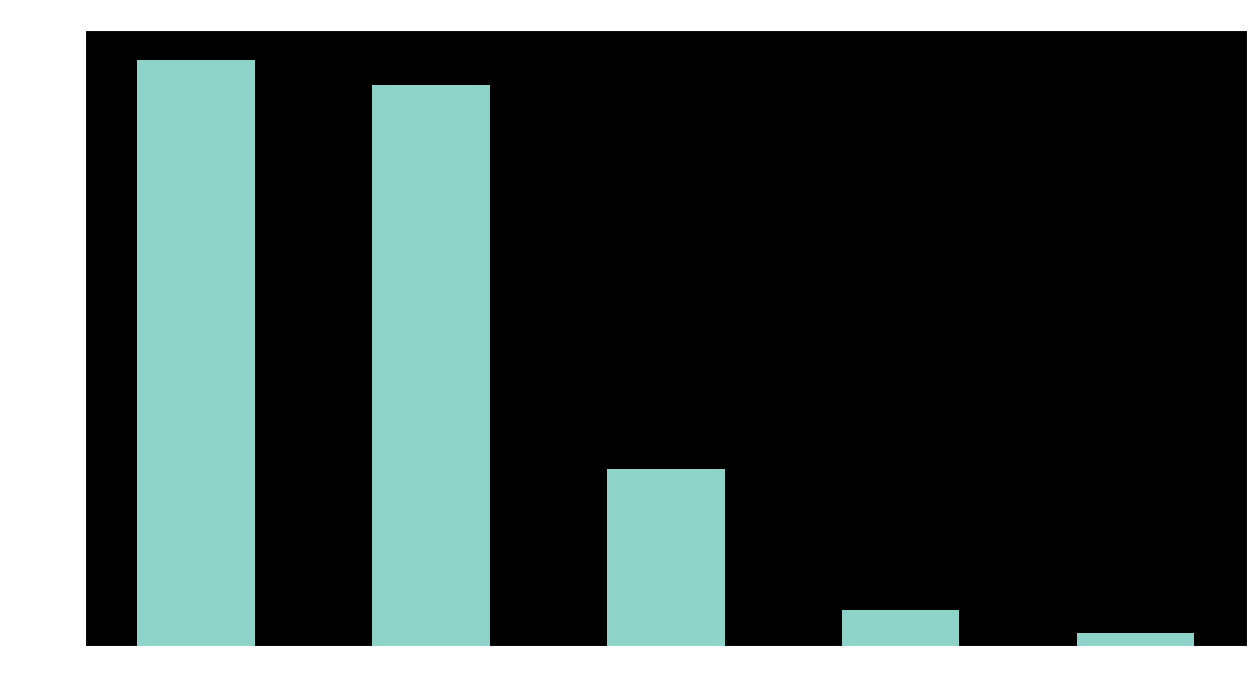

Manhattan is having the highest 43555 airbnbs.


In [132]:
Top_Neighbourhood_Groups = working_df["neighbourhood group"].value_counts()

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")
plt.bar(Top_Neighbourhood_Groups.index, Top_Neighbourhood_Groups.values, width = 0.5)
plt.xlabel('',fontsize = 12)
plt.ylabel('No. of Airbnb',fontsize = 12)
plt.title('Number of Airbnb in the Neighbourhood group',fontsize = 12)
plt.xticks(rotation=0, ha='center',fontsize = 12)
plt.show()

print(Top_Neighbourhood_Groups.index[0],f"is having the highest {Top_Neighbourhood_Groups.values[0]} airbnbs.")

#### This analysis reveals that Manhattan is the highest popular neighborhood on Airbnb, indicating its widespread popularity among travelers. Following closely, Brooklyn emerges as the second most popural location, showcasing its growing appeal as a desirable destination for Airbnb users.

In [133]:
working_df["neighbourhood"].value_counts()

Bedford-Stuyvesant        7906
Williamsburg              7732
Harlem                    5440
Bushwick                  4956
Hell's Kitchen            3948
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

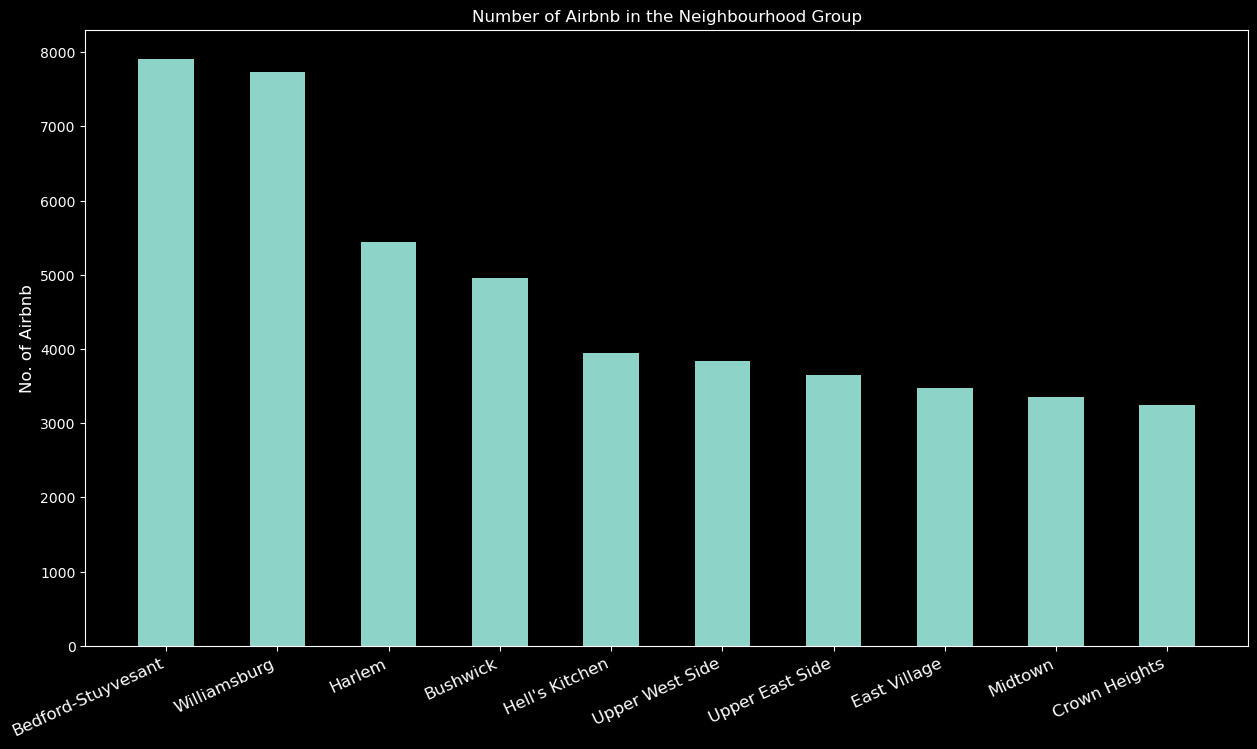

Bedford-Stuyvesant is having the highest 7906 airbnbs.


In [134]:
Top_10_Neighbourhood = (working_df["neighbourhood"].value_counts()).head(10)

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")
plt.bar(Top_10_Neighbourhood.index, Top_10_Neighbourhood.values, width = 0.5)
plt.xlabel('',fontsize = 12)
plt.ylabel('No. of Airbnb',fontsize = 12)
plt.title('Number of Airbnb in the Neighbourhood Group',fontsize = 12)
plt.xticks(rotation=25, ha='right',fontsize = 12)
plt.show()

print(Top_10_Neighbourhood.index[0],f"is having the highest {Top_10_Neighbourhood.values[0]} airbnbs.")

#### The analysis highlights that Bedford-Stuyvesant boasts the highest number of Airbnb listings, with a total of 7,906 accommodations available. While, Williamsburg secures the second-highest spot with 7,732 listings, indicating its significant presence in the Airbnb market.

<h1 align='center'>Correlation Analysis </h1>

In [135]:
working_df.corr()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,reviews per month
id,1.000000,-0.001132,-0.008560,0.042497,0.005905,0.048249,0.006826,0.007182,0.005367,-0.041992,0.038103
host id,-0.001132,1.000000,0.000387,-0.008788,0.003802,0.001362,0.003614,0.003407,-0.001505,-0.004817,-0.001962
lat,-0.008560,0.000387,1.000000,0.074429,0.000794,0.001316,-0.005577,-0.005562,0.016184,-0.025160,-0.019667
long,0.042497,-0.008788,0.074429,1.000000,-0.003785,0.005212,0.003346,0.003192,-0.038687,0.069028,0.119056
instant_bookable,0.005905,0.003802,0.000794,-0.003785,1.000000,0.002507,0.000464,0.001031,-0.003084,0.001025,0.002049
Construction year,0.048249,0.001362,0.001316,0.005212,0.002507,1.000000,0.003260,0.003675,-0.000186,-0.030154,0.006765
price,0.006826,0.003614,-0.005577,0.003346,0.000464,0.003260,1.000000,0.997825,-0.002084,0.005143,0.004041
service fee,0.007182,0.003407,-0.005562,0.003192,0.001031,0.003675,0.997825,1.000000,-0.002264,0.005036,0.003943
minimum nights,0.005367,-0.001505,0.016184,-0.038687,-0.003084,-0.000186,-0.002084,-0.002264,1.000000,-0.050139,-0.094780
number of reviews,-0.041992,-0.004817,-0.025160,0.069028,0.001025,-0.030154,0.005143,0.005036,-0.050139,1.000000,0.590919


#### Based on the correlation coefficients provided, let's determine the top two correlation columns:

- Correlation between "price" and "service fee": 0.997825

This indicates a very strong positive correlation between the price of listings and the service fees associated with them.

- Correlation between "number of reviews" and "reviews per month": 0.590919

This suggests a moderate positive correlation between the number of reviews a listing has received and the average number of reviews per month.

In [136]:
average_service_fee = working_df.groupby('price')['service fee'].mean().reset_index()


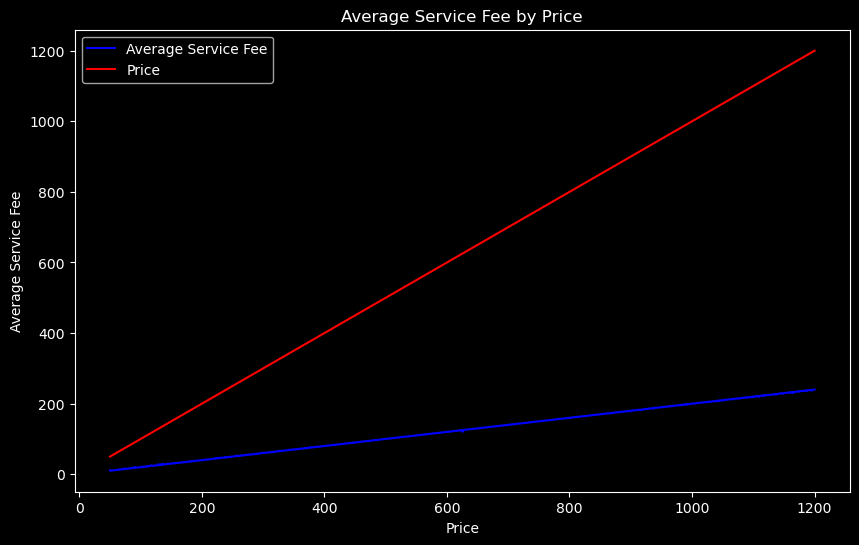

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(average_service_fee['price'], average_service_fee['service fee'], color='blue', label='Average Service Fee')
plt.xlabel('Price')
plt.ylabel('Average Service Fee')
plt.title('Average Service Fee by Price')

# Adding the line for price
plt.plot(average_service_fee['price'], average_service_fee['price'], color='red', label='Price')

plt.legend()  # Show legend with labels
plt.show()


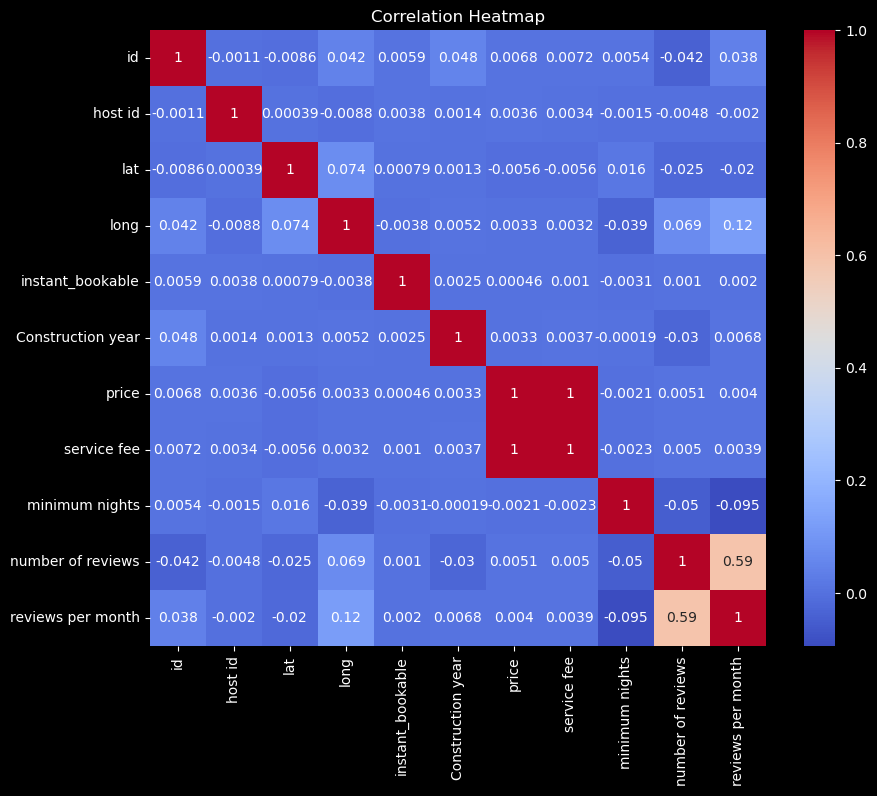

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the correlation matrix
corr_matrix = working_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



Based on the heatmap, correlation columns:

- Correlation between "price" and "service fee": 1
1. This indicates a very strong positive correlation between the price of listings and the service fees associated with them.
2. We have checked it from line chart too.

- Correlation between "number of reviews" and "reviews per month": 0.59
1. This suggests a moderate positive correlation between the number of reviews a listing has received and the average number of reviews per month.

<h1 align='center' >Yearly trends Analysis </h1>

In [141]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

In [142]:
working_df['last review'] = pd.to_datetime(working_df['last review'])
working_df['year'] = working_df['last review'].dt.year
working_df['month'] = working_df['last review'].dt.month


In [143]:
average_prices = working_df.groupby('year')['price'].mean().reset_index()


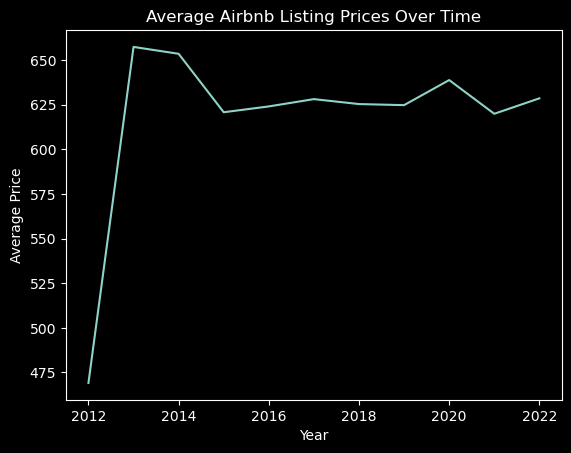

In [145]:
import matplotlib.pyplot as plt

plt.plot(average_prices['year'], average_prices['price'])
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Airbnb Listing Prices Over Time')
plt.show()


#### Highest Average price was in between 2012 to 2014 and then big deep after 2014

# <h1 align='center'> Monthly Trend analysis </h1>

In [146]:
average_prices = working_df.groupby(['year', 'month'])['price'].mean().reset_index()


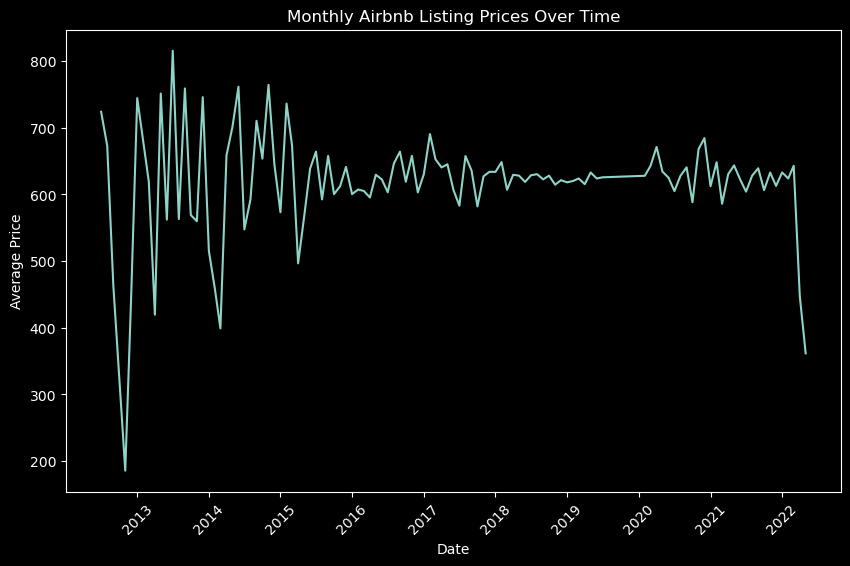

In [147]:
# Convert year and month to a formatted date string
average_prices['date'] = pd.to_datetime(average_prices[['year', 'month']].assign(day=1))
average_prices = average_prices.sort_values('date')

# Plotting the monthly trends
plt.figure(figsize=(10, 6))
plt.plot(average_prices['date'], average_prices['price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Monthly Airbnb Listing Prices Over Time')
plt.xticks(rotation=45)
plt.show()


#### Highest average price between 2013- 2014 mostly in 2 quarter months and big deep in 1 quarter of 2014-2015

<h1 align='center' >Most Common Property Analysis </h1>

In [148]:
property_counts = working_df.groupby(['neighbourhood group', 'room type']).size().reset_index(name='count')


In [149]:
property_counts_sorted = property_counts.sort_values('count', ascending=False)


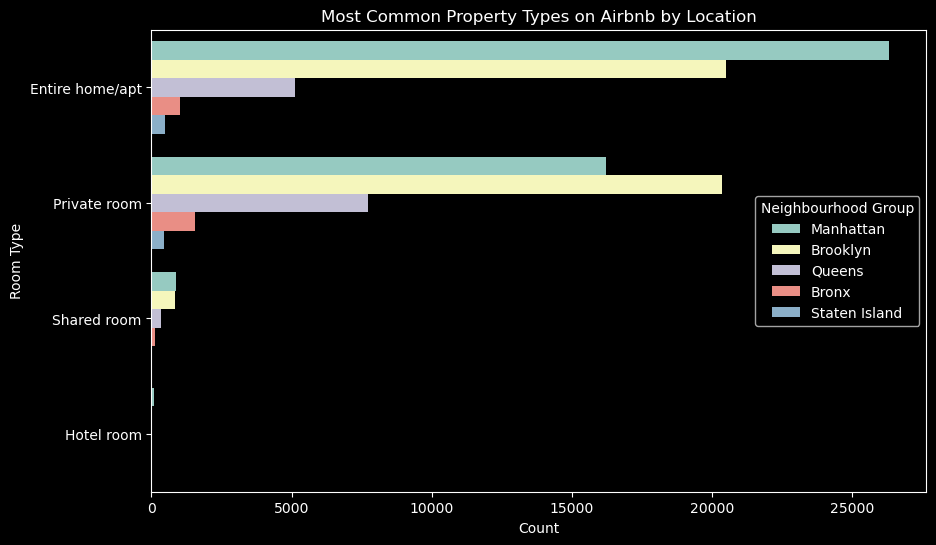

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='room type', hue='neighbourhood group', data=property_counts_sorted)
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.title('Most Common Property Types on Airbnb by Location')
plt.legend(title='Neighbourhood Group')
plt.show()


#### The analysis demonstrates that in Manhattan, the most prevalent property type is the entire room/apartment, suggesting a preference for private accommodations.Conversely, in Brooklyn, Private rooms are the most common property type, suggesting a trend towards private spaces or more affordable options in this neighborhood.

<h1 align='center'>Price Analysis</h1>

In [152]:
price_analysis_df = working_df[['neighbourhood group','neighbourhood', 'instant_bookable','cancellation_policy', 'room type', 
            'Construction year', 'price','service fee', 'minimum nights']]

In [153]:
price_analysis_df["Total_Price"] = price_analysis_df["price"] + price_analysis_df["service fee"]

In [154]:
price_analysis_df.groupby("neighbourhood group")["Total_Price"].mean()

neighbourhood group
Bronx            753.207226
Brooklyn         751.745967
Manhattan        747.175528
Queens           756.253761
Staten Island    748.770268
Name: Total_Price, dtype: float64

In [155]:
price_analysis_df.groupby("instant_bookable")["Total_Price"].mean().sort_values(ascending = False)

instant_bookable
True     750.61232
False    750.16833
Name: Total_Price, dtype: float64

In [156]:
price_analysis_df.groupby("cancellation_policy")["Total_Price"].mean().sort_values(ascending = False)

cancellation_policy
flexible    751.431516
moderate    750.261459
strict      749.476945
Name: Total_Price, dtype: float64

In [157]:
price_analysis_df.groupby("Construction year")["Total_Price"].mean().sort_values(ascending = False)

Construction year
2008    766.290922
2006    761.844388
2014    757.131303
2004    755.974170
2021    755.545017
2022    754.831943
2017    754.521183
2011    752.722489
2010    751.850252
2007    751.439201
2016    749.738776
2018    749.656228
2012    748.862776
2003    747.882253
2020    745.850473
2005    744.221210
2013    742.981148
2009    742.238870
2015    740.812589
2019    734.386099
0       719.322491
Name: Total_Price, dtype: float64

In [158]:
price_analysis_df.groupby("minimum nights")["Total_Price"].mean().sort_values(ascending = False)

minimum nights
1223.0    1440.000000
299.0     1429.000000
225.0     1418.000000
370.0     1415.000000
210.0     1411.666667
             ...     
65.0       137.000000
333.0      131.000000
350.0      128.000000
198.0       84.000000
265.0       62.000000
Name: Total_Price, Length: 144, dtype: float64

In [159]:
price_analysis_df.groupby("room type")["Total_Price"].mean().sort_values(ascending = False)

room type
Hotel room         798.557009
Shared room        761.814091
Entire home/apt    750.238769
Private room       749.898318
Name: Total_Price, dtype: float64

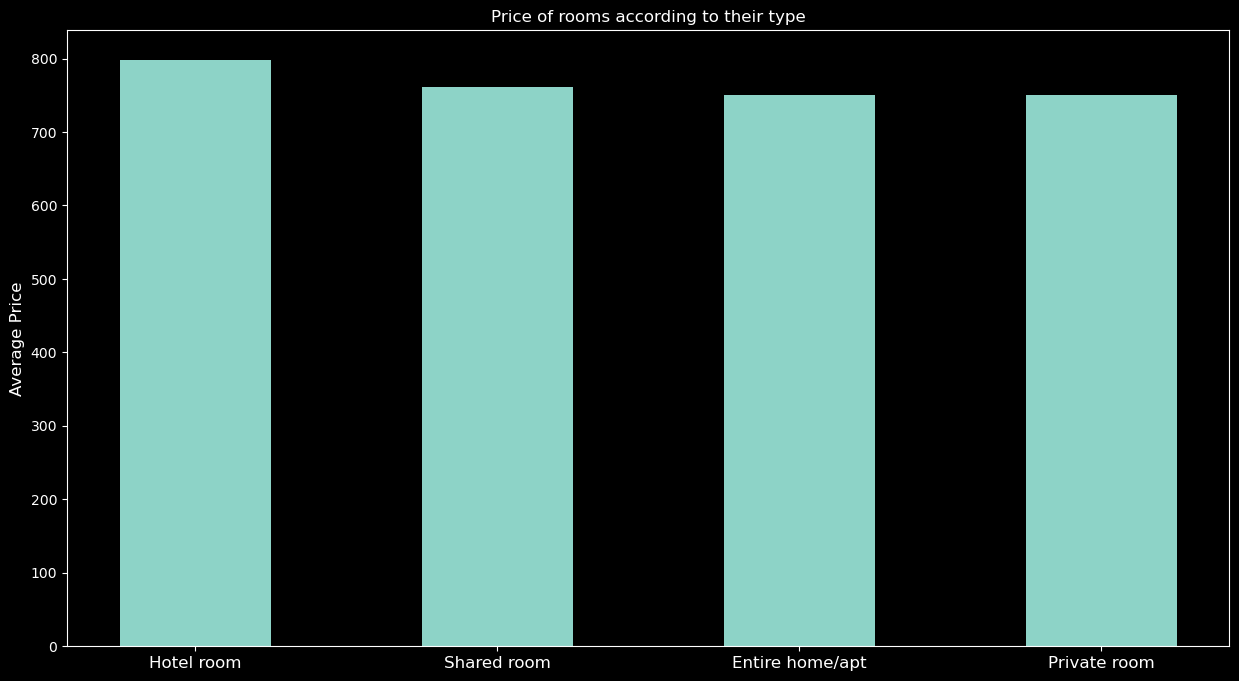

Hotel room is having the highest 798.5570086956521 Average price.


In [160]:
room_price = price_analysis_df.groupby("room type")["Total_Price"].mean().sort_values(ascending = False)

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")
plt.bar(room_price.index, room_price.values, width = 0.5)
plt.xlabel('',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12)
plt.title('Price of rooms according to their type',fontsize = 12)
plt.xticks(rotation=0, ha='center',fontsize = 12)
plt.show()

print(room_price.index[0],f"is having the highest {room_price.values[0]} Average price.")

In [161]:
price_analysis_df.groupby("neighbourhood")["Total_Price"].mean().sort_values(ascending = False).head(10)

neighbourhood
New Dorp                  1254.250000
Chelsea, Staten Island    1250.000000
Fort Wadsworth            1229.000000
Little Neck                981.250000
Jamaica Hills              975.476190
Shore Acres                966.142857
Arden Heights              965.888889
Midland Beach              955.352941
Mill Basin                 930.285714
Riverdale                  922.578947
Name: Total_Price, dtype: float64

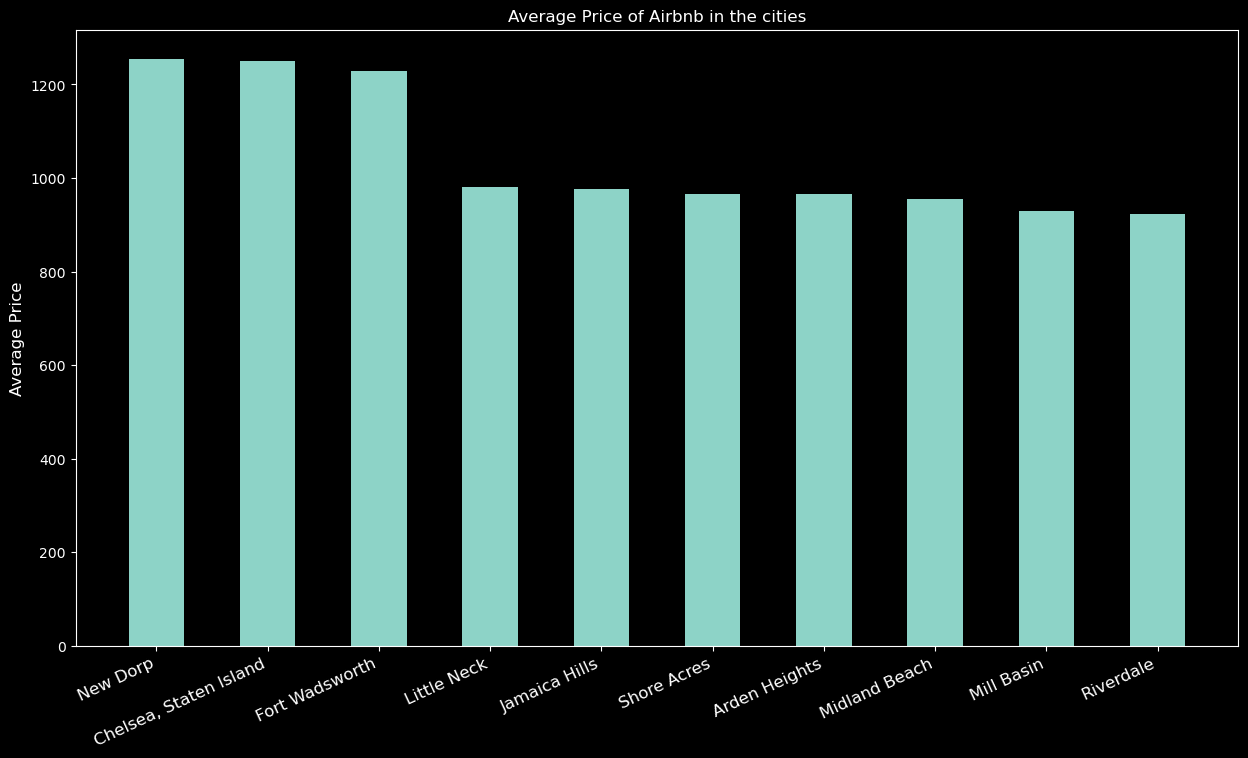

New Dorp is the most expensive city with 1254.25 average price for a Airbnb.


In [162]:
Expensive_Cities = price_analysis_df.groupby("neighbourhood")["Total_Price"].mean().sort_values(ascending = False).head(10)

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")
plt.bar(Expensive_Cities.index, Expensive_Cities.values, width = 0.5)
plt.xlabel('',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12)
plt.title('Average Price of Airbnb in the cities',fontsize = 12)
plt.xticks(rotation=25, ha='right',fontsize = 12)
plt.show()

print(Expensive_Cities.index[0],f"is the most expensive city with {Expensive_Cities.values[0]} average price for a Airbnb.")

In [163]:
price_analysis_df.groupby("neighbourhood")["Total_Price"].mean().sort_values(ascending = False).tail(10)

neighbourhood
Randall Manor                 566.800000
West Farms                    555.833333
Emerson Hill                  532.300000
Bay Terrace, Staten Island    515.500000
Castleton Corners             500.615385
Richmondtown                  448.000000
Breezy Point                  371.666667
Rossville                     360.666667
Spuyten Duyvil                352.111111
Lighthouse Hill               129.000000
Name: Total_Price, dtype: float64

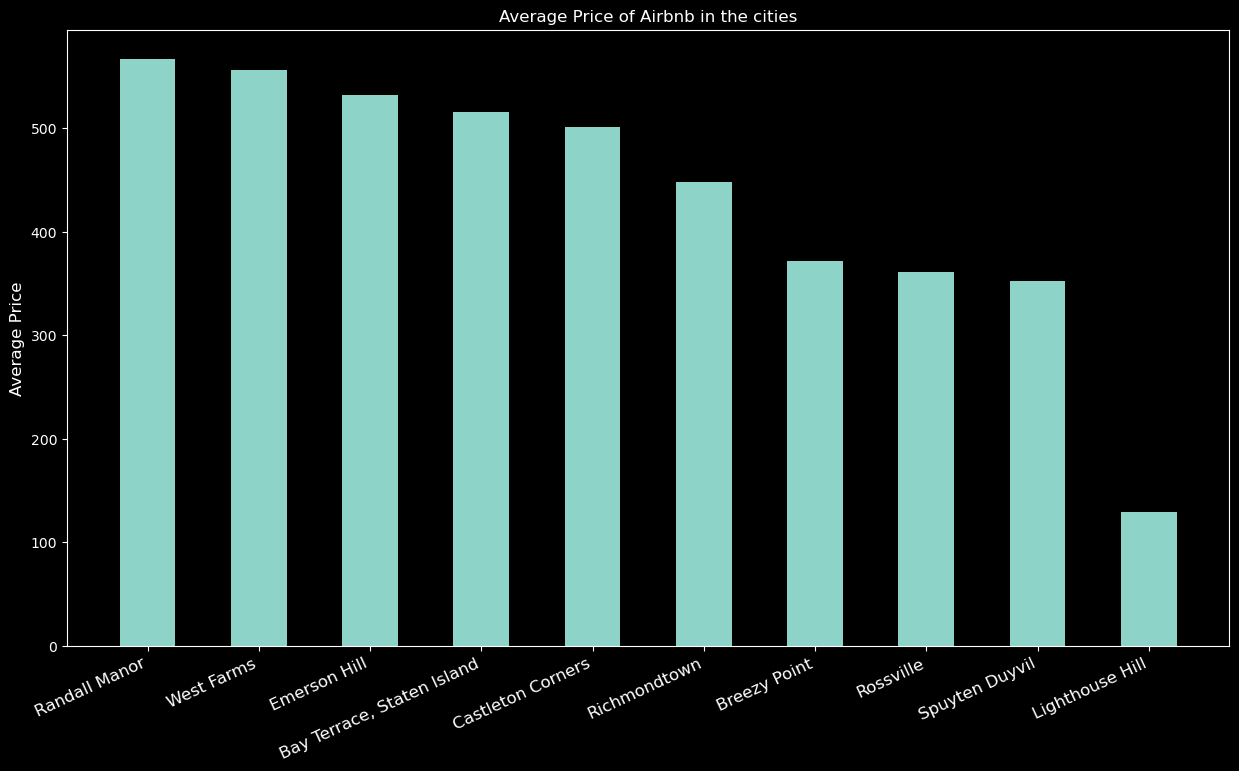

Lighthouse Hill is the most affordable city with 129.0 average price for a Airbnb.


In [164]:
cheap_Cities = price_analysis_df.groupby("neighbourhood")["Total_Price"].mean().sort_values(ascending = False).tail(10)

plt.figure(figsize=(15, 8))
plt.style.use("dark_background")
plt.bar(cheap_Cities.index, cheap_Cities.values, width = 0.5)
plt.xlabel('',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12)
plt.title('Average Price of Airbnb in the cities',fontsize = 12)
plt.xticks(rotation=25, ha='right',fontsize = 12)
plt.show()

print(cheap_Cities.index[9],f"is the most affordable city with {cheap_Cities.values[9]} average price for a Airbnb.")

In [165]:
price_analysis_df.groupby(price_analysis_df["minimum nights"]>365)["Total_Price"].mean()

minimum nights
False    750.354615
True     848.361111
Name: Total_Price, dtype: float64

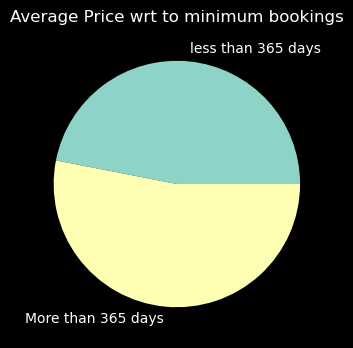

In [166]:
day_of_bookings = price_analysis_df.groupby(price_analysis_df["minimum nights"]>365)["Total_Price"].mean()

plt.figure(figsize=(8, 4))
plt.style.use("dark_background")
plt.pie(day_of_bookings, labels =["less than 365 days","More than 365 days"])
plt.title('Average Price wrt to minimum bookings',fontsize = 12)
plt.xticks(ticks = [], lables = ["1","2"], rotation=25, ha='right',fontsize = 12)
plt.show()


##### - The listing pricing is mainly depend upon "Room-Type","Neighbourhood","Minimum no. of Bookings". 
##### - Hotel-room are more expensive than the other room type options like apatment renting/house renting and most of the people go for these options. 
##### - Cities "New Dorp", "Fort Wadsworth", & "Chelsea, Staten Island" offers airbnb at a very high rate as compared to the cities like "Rossville", "Spuyten Duyvil ", & "Lighthouse Hill" which has airbnbs priced lower than the half rate of the expensive ones.
##### - Airbnbs which only takes booking for more than a year offers higher price than the airbnbs which we can opted for less than 365 days. 

<h1 align='center'> Review Analysis </h1>

In [167]:
working_df.columns

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'year', 'month'],
      dtype='object')

In [168]:
Review_Analysis_df = working_df[['id', 'host id','host_identity_verified','number of reviews', 'last review',
       'reviews per month', 'neighbourhood group',
       'neighbourhood']]

In [169]:
### Checking the duplicates in the "id" columns

Review_Analysis_df[Review_Analysis_df["id"].duplicated(keep = False)]

,id,host id,host_identity_verified,number of reviews,last review,reviews per month,neighbourhood group,neighbourhood


In [170]:
### dropping the duplicates

Review_Analysis_df.drop_duplicates(subset = "id",inplace = True)

In [171]:
Review_Analysis_df[Review_Analysis_df["id"].duplicated(keep = False)]

,id,host id,host_identity_verified,number of reviews,last review,reviews per month,neighbourhood group,neighbourhood


In [172]:
Review_Analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   number of reviews       102053 non-null  float64       
 4   last review             102053 non-null  datetime64[ns]
 5   reviews per month       86235 non-null   float64       
 6   neighbourhood group     102053 non-null  object        
 7   neighbourhood           102053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [173]:
Review_Analysis_df.groupby("host id")["number of reviews"].sum().sort_values(ascending = False).head(20)

host id
53558555483    1024.0
44069230937    1010.0
23813117370     966.0
41031720514     884.0
20032806094     849.0
78564178478     797.0
87332142446     776.0
90212124971     738.0
12571850348     698.0
19892961158     679.0
2035884636      648.0
28338699286     638.0
58525948778     629.0
39066649621     618.0
51011773515     607.0
5145717894      607.0
58603906630     597.0
3714601299      597.0
14713491370     597.0
63946915448     594.0
Name: number of reviews, dtype: float64

In [174]:
Review_Analysis_df["reviews per month"].value_counts()

0.03     1665
0.05     1489
1.00     1454
0.09     1264
0.04     1260
         ... 
9.10        1
10.36       1
8.50        1
15.32       1
33.08       1
Name: reviews per month, Length: 1016, dtype: int64

In [175]:
Review_Analysis_df[~(Review_Analysis_df["reviews per month"]=="Not available")]

,id,host id,host_identity_verified,number of reviews,last review,reviews per month,neighbourhood group,neighbourhood
0,1001254,80014485718,unconfirmed,9.0,2021-10-19,0.21,Brooklyn,Kensington
1,1002102,52335172823,verified,45.0,2022-05-21,0.38,Manhattan,Midtown
2,1002403,78829239556,unconfirmed,0.0,2022-05-21,NaN,Manhattan,Harlem
3,1002755,85098326012,unconfirmed,270.0,2019-07-05,4.64,Brooklyn,Clinton Hill
4,1003689,92037596077,verified,9.0,2018-11-19,0.10,Manhattan,East Harlem
...,...,...,...,...,...,...,...,...
102053,57365208,77326652202,unconfirmed,12.0,2019-03-27,0.44,Brooklyn,Flatbush
102054,57365760,45936254757,verified,19.0,2017-08-31,0.72,Brooklyn,Bushwick
102055,57366313,23801060917,verified,50.0,2019-06-26,3.12,Brooklyn,Bedford-Stuyvesant
102056,57366865,15593031571,unconfirmed,0.0,2019-06-26,NaN,Manhattan,Harlem


In [176]:
Review_Analysis_df[~(Review_Analysis_df["reviews per month"]=="Not available")]["reviews per month"].mean()

1.3754621673334495

In [177]:
Review_Analysis_df["host id"].nunique()

102052

In [178]:
Review_Analysis_df["id"].nunique()

102053

In [179]:
Review_Analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   number of reviews       102053 non-null  float64       
 4   last review             102053 non-null  datetime64[ns]
 5   reviews per month       86235 non-null   float64       
 6   neighbourhood group     102053 non-null  object        
 7   neighbourhood           102053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [180]:
Review_Analysis_df["reviews per month"].replace({"Not available":1.37},inplace = True)

In [181]:
Review_Analysis_df.groupby("host id")["reviews per month"].sum().sort_values(ascending = False).head(20)

host id
20032806094    90.00
78564178478    84.49
39066649621    65.74
38570192102    58.50
64842618134    58.50
53558555483    57.31
29654920039    47.11
76770065714    44.63
23813117370    34.46
44069230937    33.08
87332142446    30.51
98401518015    27.95
64359873512    27.95
14713491370    26.11
21689315703    25.62
41031720514    25.23
90212124971    24.49
61741784469    22.53
48976292556    22.04
55502607572    20.94
Name: reviews per month, dtype: float64

In [182]:
Review_Analysis_df.groupby("neighbourhood group")["reviews per month"].sum().sort_values(ascending = False).head(20)

neighbourhood group
Brooklyn         46866.76
Manhattan        45222.96
Queens           20964.43
Bronx             4101.72
Staten Island     1457.11
Name: reviews per month, dtype: float64

In [183]:
Review_Analysis_df.groupby("neighbourhood group")["number of reviews"].sum().sort_values(ascending = False).head(20)

neighbourhood group
Brooklyn         1189991.0
Manhattan        1050741.0
Queens            444231.0
Bronx              85510.0
Staten Island      33971.0
Name: number of reviews, dtype: float64

#### -  The number of unique host IDs for the given reviews is 102,052.
#### - The host with the ID 20032806094 has the highest average reviews per month, with a value of 90.00.
#### - The top two neighborhood groups based on reviews per month are Brooklyn with an average of 46,866.76 reviews per month and Manhattan with an average of 45,222.96 reviews per month.
#### - The top two neighborhood groups based on the number of reviews are Brooklyn with a total of 1,189,991.0 reviews and Manhattan with a total of 1,050,741.0 reviews. 

<h1 align='center'>Instant Bookablility Analysis </h1>

In [184]:
working_df.columns

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'year', 'month'],
      dtype='object')

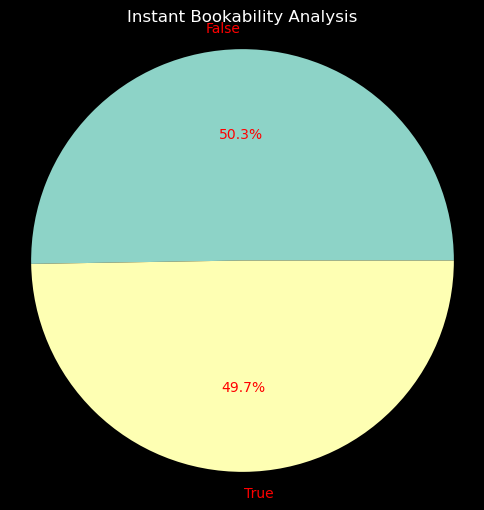

In [185]:
# Calculate instant bookability counts
instant_bookable_counts = working_df['instant_bookable'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(instant_bookable_counts, labels=instant_bookable_counts.index, autopct='%1.1f%%',textprops={'color': 'red'})
plt.title('Instant Bookability Analysis')
plt.axis('equal')

# Display the chart
plt.show()



#### - Approximately 49.7% of customers use Instant booking, while 50.3% do not.

# <h1 align='center'> Cancellation policy Analysis </h1>

In [186]:
policy_counts = working_df['cancellation_policy'].value_counts()


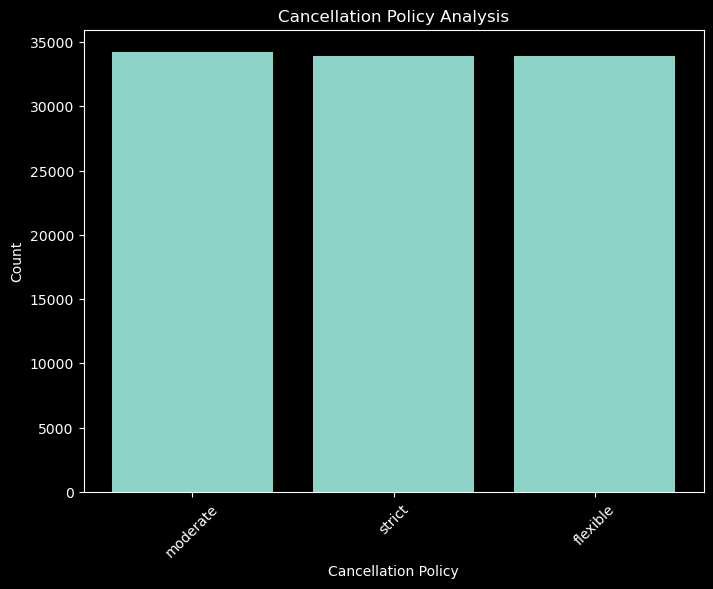

In [187]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(policy_counts.index, policy_counts.values)
plt.title('Cancellation Policy Analysis')
plt.xlabel('Cancellation Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

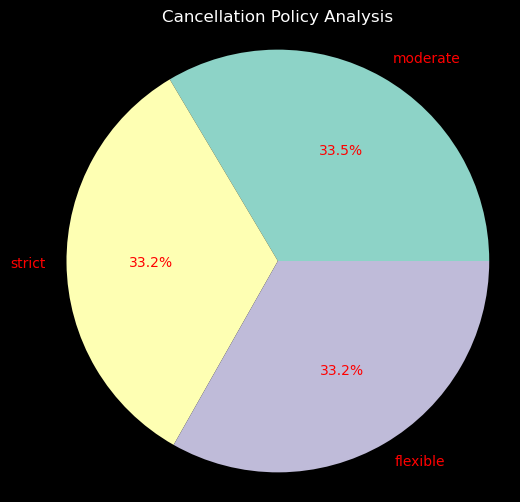

In [188]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(policy_counts, labels=policy_counts.index, autopct='%1.1f%%',textprops={'color': 'red'})
plt.title('Cancellation Policy Analysis')
plt.axis('equal')

# Display the chart
plt.show()


#### - The cancellation policy distribution shows that 33.5% have a moderate policy, and 33.2% have either strict or flexible policies.

<h1 align='center'>Construction year Analysis </h1>

In [189]:
year_counts = working_df['Construction year'].value_counts().sort_index()


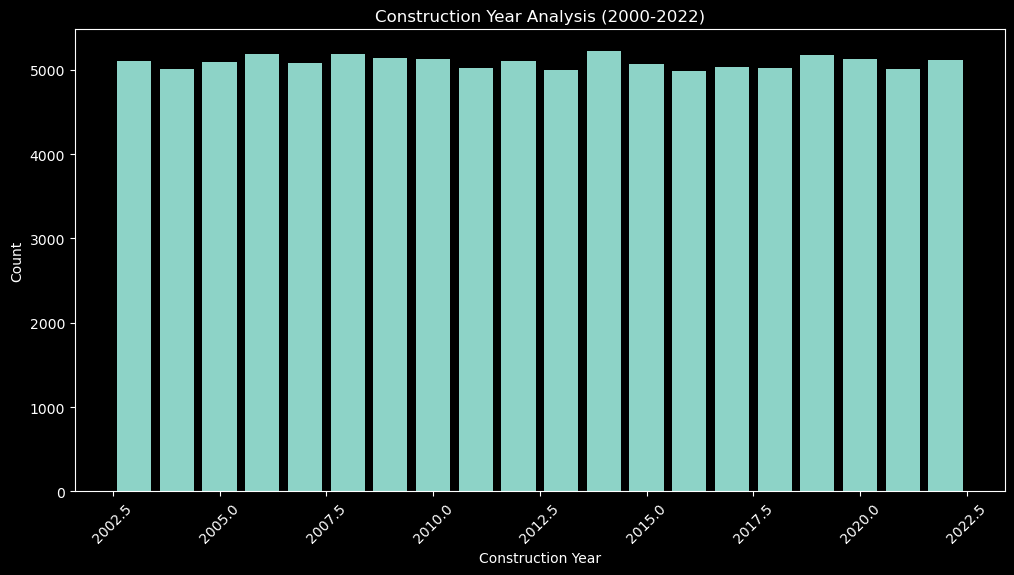

In [190]:
# Filter the data for construction years between 2000 and 2022
filtered_data = working_df[(working_df['Construction year'] >= 2000) & (working_df['Construction year'] <= 2022)]

# Calculate year counts
year_counts = filtered_data['Construction year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index, year_counts.values)
plt.title('Construction Year Analysis (2000-2022)')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

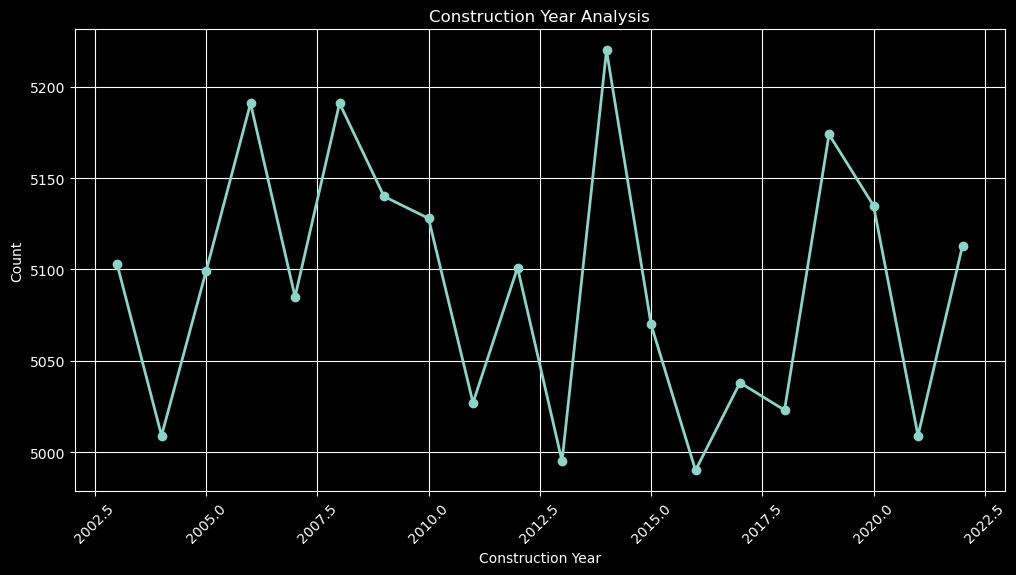

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', linewidth=2)
plt.title('Construction Year Analysis')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### - The highest value counts for construction year occur in 2014, while the minimum counts are in 2016.

<h1 align='center'>Top 5 popular name</h1>

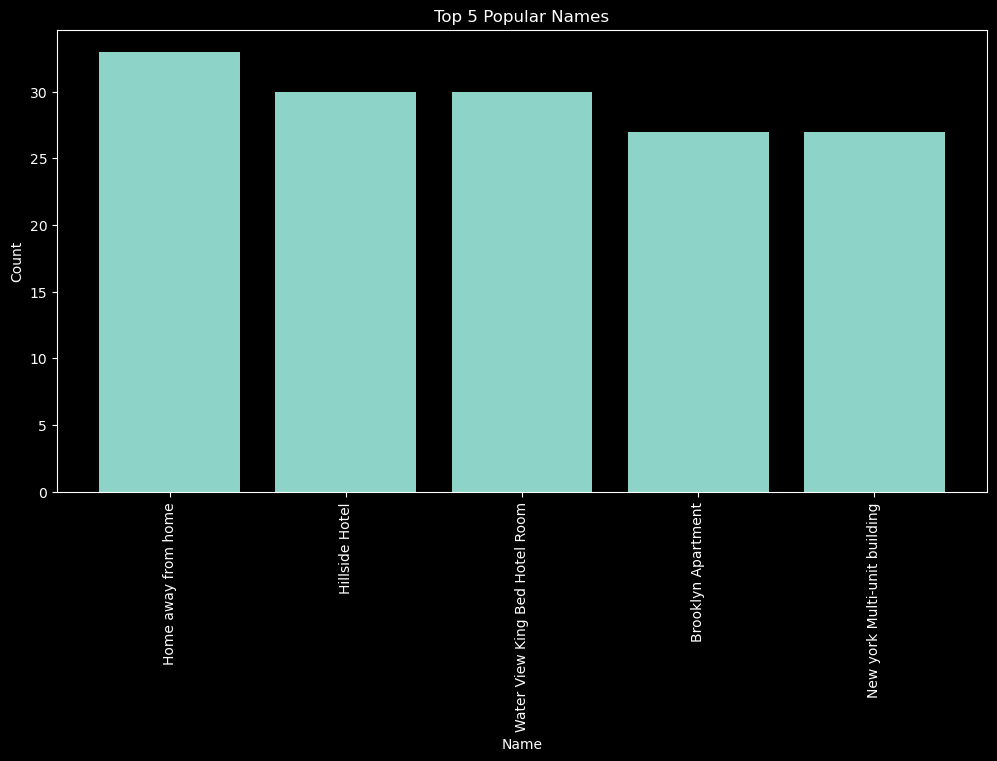

In [193]:
import matplotlib.pyplot as plt

top_5_names = df['NAME'].value_counts().head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_5_names.index, top_5_names.values)
plt.title('Top 5 Popular Names')
plt.xlabel('Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#### - The most popular property type is "Home away from home," followed by "Hillside Hotel."

<h1 align='center'>Top 10 popular host name</h1>

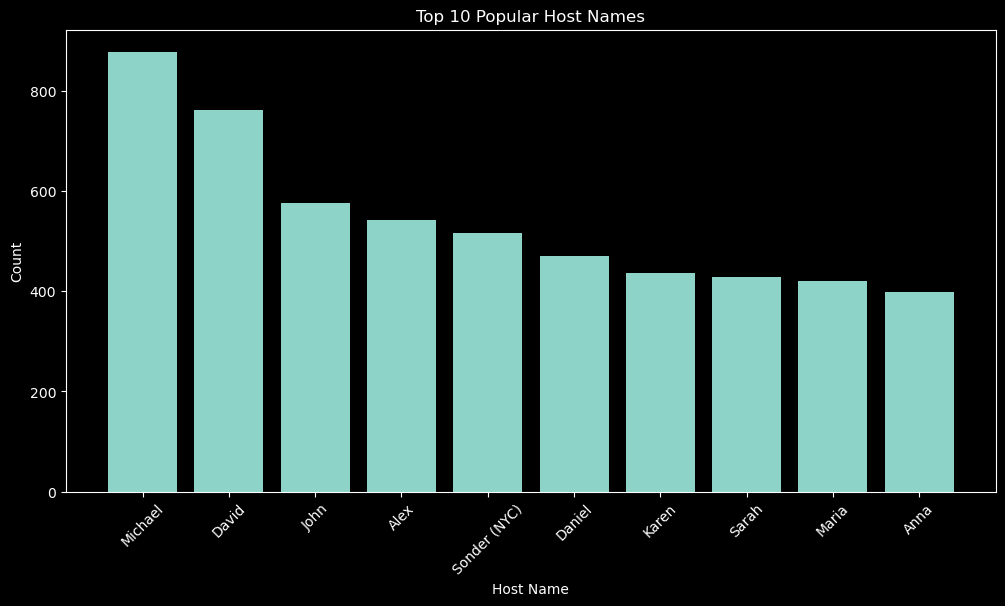

In [194]:
top_10_host_names = df['host name'].value_counts().head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_10_host_names.index, top_10_host_names.values)
plt.title('Top 10 Popular Host Names')
plt.xlabel('Host Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### - Among hosts, the most popular name is Michael, followed by David.

<h1 align ='center'> Price Prediction Model </h1>

In [290]:
working_df.corr()['price']

id                   0.006826
host id              0.003614
lat                 -0.005577
long                 0.003346
instant_bookable     0.000464
Construction year    0.003260
price                1.000000
service fee          0.997825
minimum nights      -0.002084
number of reviews    0.005143
reviews per month    0.004041
year                 0.000887
month               -0.002666
Name: price, dtype: float64

In [196]:
working_df.columns

Index(['id', 'host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'year', 'month'],
      dtype='object')

In [197]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102053 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      102053 non-null  int64         
 1   host id                 102053 non-null  int64         
 2   host_identity_verified  102053 non-null  object        
 3   neighbourhood group     102053 non-null  object        
 4   neighbourhood           102053 non-null  object        
 5   lat                     102053 non-null  float64       
 6   long                    102053 non-null  float64       
 7   instant_bookable        102053 non-null  bool          
 8   cancellation_policy     102053 non-null  object        
 9   room type               102053 non-null  object        
 10  Construction year       102053 non-null  int64         
 11  price                   102053 non-null  float64       
 12  service fee             102053

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
working_df.shape

(102053, 19)

In [278]:
X = working_df[['neighbourhood group','instant_bookable','service fee','cancellation_policy','room type','year']]

In [279]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,instant_bookable,service fee,year,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,neighbourhood group_Staten Island,cancellation_policy_moderate,cancellation_policy_strict,room type_Hotel room,room type_Private room,room type_Shared room
0,False,193.0,2021,1,0,0,0,0,1,0,1,0
1,False,28.0,2022,0,1,0,0,1,0,0,0,0
2,True,124.0,2022,0,1,0,0,0,0,0,1,0
3,True,74.0,2019,1,0,0,0,1,0,0,0,0
4,False,41.0,2018,0,1,0,0,1,0,0,0,0


In [280]:
Y = working_df['price']
Y.head()

0    966.0
1    142.0
2    620.0
3    368.0
4    204.0
Name: price, dtype: float64

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81642, 12)
(20411, 12)
(81642,)
(20411,)


In [282]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [283]:
# print the intercept
print(model.intercept_)

25.512433265812888


In [284]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter     

,Coefficient
instant_bookable,-0.508303
service fee,4.989702
year,-0.011333
neighbourhood group_Brooklyn,-0.623902
neighbourhood group_Manhattan,-0.951434
neighbourhood group_Queens,-0.970617
neighbourhood group_Staten Island,-0.793410
cancellation_policy_moderate,-0.030415
cancellation_policy_strict,-0.130179
room type_Hotel room,4.404657


In [285]:
predictions = model.predict(X_test)
predictions

array([630.69143622, 575.28964474, 834.45245039, ...,  51.26664619,
       620.19695953, 495.45441846])

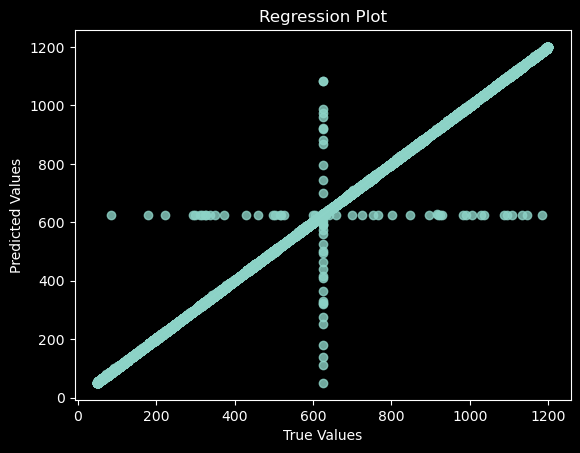

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the true values in y_test and the predicted values in predictions

# Create a scatter plot with a regression line
sns.regplot(x=y_test, y=predictions)

# Add labels and title to the plot
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')

# Show the plot
plt.show()

In [287]:
import statsmodels.api as sm

# Convert the target variable (y_train) to float
y_train = y_train.astype(float)

# Convert the input features (X_train) to float
X_train = X_train.astype(float)

# Add a constant term to the input features
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.469e+06
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:26:11   Log-Likelihood:            -3.6995e+05
No. Observations:               81642   AIC:                         7.399e+05
Df Residuals:                   81629   BIC:                         7.401e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [288]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, predictions)
print('MAE:', score)

MAE: 2.37630223517307


#### - Having a high R-squared value (0.995) indicates that the model has a strong ability to explain the variance in the target variable. Additionally, the relatively low MAE value (2.55) suggests that the model's predictions are generally accurate and have a small amount of error.

# Conclusion 
- Manhattan is the most popular neighborhood on Airbnb, followed by Brooklyn.
- Bedford-Stuyvesant has the highest number of Airbnb listings, while Williamsburg is the second highest.
- There is a strong positive correlation (1) between the price of listings and the associated service fees.
- A moderate positive correlation (0.59) exists between the number of reviews a listing has received and the average number of reviews per month.
- The highest average prices were observed between 2012 and 2014, followed by a significant decrease after 2014.
- The most prevalent property type in Manhattan is the entire room/apartment, while private rooms are more common in Brooklyn.
- The pricing of listings depends on factors such as room type, neighborhood, and minimum number of bookings.
- There are 102,052 unique host IDs for the given reviews, with one host (ID: 20032806094) having the highest average reviews per month at 90.00. The top two neighborhood groups based on reviews per month are Brooklyn (46,866.76) and Manhattan (45,222.96), while the top two neighborhood groups based on the number of reviews are Brooklyn (1,189,991.0) and Manhattan (1,050,741.0).
- Hotel rooms tend to be more expensive than apartment or house rentals.
- Certain neighborhoods like "New Dorp," "Fort Wadsworth," and "Chelsea, Staten Island" have higher Airbnb rates compared to "Rossville," "Spuyten Duyvil," and "Lighthouse Hill."
- Listings with a minimum booking requirement of more than a year generally have higher prices.
- Approximately 49.7% of customers use Instant booking, while 50.3% do not.
- The cancellation policy distribution shows that 33.5% have a moderate policy, and 33.2% have either strict or flexible policies.
- The highest value counts for construction year occur in 2014, while the minimum counts are in 2016.
- The most popular property type is "Home away from home," followed by "Hillside Hotel."
- Among hosts, the most popular name is Michael, followed by David.

<div align="center">
    <img src="https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif">
</div>